<a href="https://colab.research.google.com/github/Achuna/Climate-Data-UMBC-Summer-Research/blob/master/Notebooks/(Time_Slices)_Dynamic_Bayesian_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Bayesian Networks tells us the probability distribution among variables, how likely something is to happen given a set of conditions. In order to identify the causal relationships between these variables, we look at the **dynamic bayesian networks** which focuses on the changes over time. 

**Dynamic Bayesian Models**

This is a time variant model of the static Bayesian model, where each time-slice has some static nodes and is then replicated over a certain time period.


While a causal interpretation does not provide any additional capabilities in terms of answering
standard probabilistic queries, it provides the basic framework for answering causal queries —
queries involving interventions in the world.



---


Helpful Resources:

https://www.cs.ubc.ca/~murphyk/Thesis/thesis.pdf

https://dslpitt.org/uai/papers/93/p64-dagum.pdf


In [0]:
!pip install pgmpy
!pip install graphviz

     |████████████████████████████████| 296kB 2.9MB/s 
     |████████████████████████████████| 1.3MB 40.3MB/s 
ERROR: scikit-image 0.15.0 has requirement networkx>=2.0, but you'll have networkx 1.11 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: networkx 2.3
    Uninstalling networkx-2.3:
      Successfully uninstalled networkx-2.3


# Data Preperation

*Using parallel processing*

In [0]:
import pandas as pd
import dask.dataframe as dd #for parallel processing
import numpy as np
from google.colab import files
import glob

#Takes in a 1D array and makes subsets of the array, returning a matrix
#Chunk size - how big each subset of the array will be
#numFiles - defines the columns
def getMatrix(array, chunkSize, numFiles):
  low = 0
  matrix = []
  for i in range(0, numFiles):
    matrix.append(array[low:low+chunkSize])
    low = low + chunkSize
  return np.transpose(matrix)


files.upload() #Upload Files from local directory

filelist = glob.glob('eof_ts*') #get all files starting with eof

#reading in files
df = dd.read_csv(filelist, names=["Initial"]) #use parallel processing to read in all the files (much faster)
df = df.compute() #create dataframe

#Dask reads in all the data into a 2D array, storing all the values in their own 1D arrays. Ex. [ [21], [23], [59] ....]
#Here I am extracting the data and putting it all in a 1D array
temp = df.values
array = []
for i in range(0, len(temp)):
  array.append(temp[i][0])
  
#set the column names  
columnNames = [filename[filename.rfind('_')+1 : len(filename)] for filename in filelist]

#To reconstruct he matrix in our desired way, call the getMatrix function  
matrix = getMatrix(array, 480, len(filelist)) #480 because we are looking at 480 months ~40 yrs

df = pd.DataFrame(matrix, columns = columnNames) #assign matrix to the dataframe

df #print dataframe

Saving eof_ts_msl-01 to eof_ts_msl-01
Saving eof_ts_msl-07 to eof_ts_msl-07
Saving eof_ts_msl-09 to eof_ts_msl-09
Saving eof_ts_si10-17 to eof_ts_si10-17
Saving eof_ts_si10-20 to eof_ts_si10-20
Saving eof_ts_si10-21 to eof_ts_si10-21
Saving eof_ts_sst-13 to eof_ts_sst-13
Saving eof_ts_sst-14 to eof_ts_sst-14
Saving eof_ts_sst-23 to eof_ts_sst-23
Saving eof_ts_t2m-00 to eof_ts_t2m-00
Saving eof_ts_t2m-07 to eof_ts_t2m-07
Saving eof_ts_t2m-24 to eof_ts_t2m-24


,sst-13,msl-07,t2m-24,t2m-00,sst-14,si10-17,t2m-07,sst-23,msl-01,si10-21,msl-09,si10-20
0,0.109273,0.260658,-3.716418,-2.080118,-1.176628,0.960358,0.774216,1.089472,-0.499200,-2.682795,1.125802,0.022619
1,-0.264073,0.916423,-1.340520,-1.580924,-1.887745,0.586016,-0.176478,0.610319,-0.359078,-0.669871,-0.683581,2.705268
2,-0.287171,-0.881304,-0.828143,-1.859885,-1.452969,0.904734,-1.190285,0.855055,-1.042020,0.898595,-1.071559,-0.686304
3,-0.656911,-0.947577,-1.569368,-1.747704,-1.353054,-0.371353,0.628816,0.363691,-0.844485,-0.647656,0.439136,-0.355621
4,-0.746113,0.484418,-1.006571,-1.864258,-1.245674,0.484028,-1.752389,-0.316216,-0.972610,-0.001191,-0.573276,-0.048683
5,-0.522640,0.375301,-0.872427,-1.956596,-1.025709,0.144092,-0.469959,0.475174,-1.497780,-0.683769,-0.382764,0.047612
6,-0.437077,0.053126,-0.632556,-1.823329,-0.713539,0.017726,-0.310096,-0.692462,-2.333303,-0.448968,0.076015,0.501210
7,-0.233569,0.166169,-0.990004,-1.992747,-0.307972,-0.532720,-0.863965,-0.534652,-0.509094,0.117248,-0.378653,-0.495057
8,-0.123470,0.317969,-0.369100,-2.066474,-0.316837,1.024950,-1.364164,-0.696437,-0.641116,-0.446868,-0.291093,-0.021234
9,0.293815,0.003307,-0.225507,-2.203395,0.010207,0.789088,-0.223483,0.181521,-0.157565,-0.724944,-0.861489,0.268508


In [0]:
def renameColumn(column, appendString):
  return column +"_"+ appendString

#take column and shift it downwards with lag = n, creating a new column
def timeLag(dataframe, variables = [], maxLag = 4, loopBack = True, replaceNaN = None): #lag in months*
  
  data = dataframe.copy() #make a copy of dataframe
  for variable in variables:
    
    columnData = pd.DataFrame(dataframe[variable]) #look at the column we want to shift

    if(loopBack):
      for i in range(1, maxLag+1):
        tempLag = np.roll(columnData , i) #cycling dataframe

        newCol = pd.DataFrame(tempLag)
        newName = renameColumn(variable, str(i))
        data[newName] = newCol
        
    else:
      for i in range(1, maxLag+1):
        tempLag = columnData.shift(i)

        newCol = pd.DataFrame(tempLag)

        #optional: replace NaN values with your own value
        if(replaceNaN is not None):
          newCol = newCol.fillna(value=replaceNaN)

        newName = renameColumn(variable, str(i))
        data[newName] = newCol
  return data


def getLag(string):
  if "_" in string:
    return str(string[string.rfind('_')+1 : len(string)])
  else:
    return str(0)
  
def withoutLag(string):
  if "_" in string:
    return str(string[0: string.rfind('_')])
  
def getLocation(string):
  if '_' in string:
    return str(string[string.rfind('-')+1 : string.rfind('_')])
  else:
    return str(string[string.rfind('-')+1 : len(string)])
  
def getCurrentNodes(columns):
  nodes = []
  for n in columns:
    if '_' not in n: nodes.append(n)
  return nodes

def isvalidPlacement(edge, alledges):
  reverseEdge = (edge[1], edge[0])
  return edge not in alledges and reverseEdge not in alledges

lagData = timeLag(df, df.columns, 3, False, None)
lagData

,sst-13,msl-07,t2m-24,t2m-00,sst-14,si10-17,t2m-07,sst-23,msl-01,si10-21,msl-09,si10-20,sst-13_1,sst-13_2,sst-13_3,msl-07_1,msl-07_2,msl-07_3,t2m-24_1,t2m-24_2,t2m-24_3,t2m-00_1,t2m-00_2,t2m-00_3,sst-14_1,sst-14_2,sst-14_3,si10-17_1,si10-17_2,si10-17_3,t2m-07_1,t2m-07_2,t2m-07_3,sst-23_1,sst-23_2,sst-23_3,msl-01_1,msl-01_2,msl-01_3,si10-21_1,si10-21_2,si10-21_3,msl-09_1,msl-09_2,msl-09_3,si10-20_1,si10-20_2,si10-20_3
0,0.109273,0.260658,-3.716418,-2.080118,-1.176628,0.960358,0.774216,1.089472,-0.499200,-2.682795,1.125802,0.022619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.264073,0.916423,-1.340520,-1.580924,-1.887745,0.586016,-0.176478,0.610319,-0.359078,-0.669871,-0.683581,2.705268,0.109273,NaN,NaN,0.260658,NaN,NaN,-3.716418,NaN,NaN,-2.080118,NaN,NaN,-1.176628,NaN,NaN,0.960358,NaN,NaN,0.774216,NaN,NaN,1.089472,NaN,NaN,-0.499200,NaN,NaN,-2.682795,NaN,NaN,1.125802,NaN,NaN,0.022619,NaN,NaN
2,-0.287171,-0.881304,-0.828143,-1.859885,-1.452969,0.904734,-1.190285,0.855055,-1.042020,0.898595,-1.071559,-0.686304,-0.264073,0.109273,NaN,0.916423,0.260658,NaN,-1.340520,-3.716418,NaN,-1.580924,-2.080118,NaN,-1.887745,-1.176628,NaN,0.586016,0.960358,NaN,-0.176478,0.774216,NaN,0.610319,1.089472,NaN,-0.359078,-0.499200,NaN,-0.669871,-2.682795,NaN,-0.683581,1.125802,NaN,2.705268,0.022619,NaN
3,-0.656911,-0.947577,-1.569368,-1.747704,-1.353054,-0.371353,0.628816,0.363691,-0.844485,-0.647656,0.439136,-0.355621,-0.287171,-0.264073,0.109273,-0.881304,0.916423,0.260658,-0.828143,-1.340520,-3.716418,-1.859885,-1.580924,-2.080118,-1.452969,-1.887745,-1.176628,0.904734,0.586016,0.960358,-1.190285,-0.176478,0.774216,0.855055,0.610319,1.089472,-1.042020,-0.359078,-0.499200,0.898595,-0.669871,-2.682795,-1.071559,-0.683581,1.125802,-0.686304,2.705268,0.022619
4,-0.746113,0.484418,-1.006571,-1.864258,-1.245674,0.484028,-1.752389,-0.316216,-0.972610,-0.001191,-0.573276,-0.048683,-0.656911,-0.287171,-0.264073,-0.947577,-0.881304,0.916423,-1.569368,-0.828143,-1.340520,-1.747704,-1.859885,-1.580924,-1.353054,-1.452969,-1.887745,-0.371353,0.904734,0.586016,0.628816,-1.190285,-0.176478,0.363691,0.855055,0.610319,-0.844485,-1.042020,-0.359078,-0.647656,0.898595,-0.669871,0.439136,-1.071559,-0.683581,-0.355621,-0.686304,2.705268
5,-0.522640,0.375301,-0.872427,-1.956596,-1.025709,0.144092,-0.469959,0.475174,-1.497780,-0.683769,-0.382764,0.047612,-0.746113,-0.656911,-0.287171,0.484418,-0.947577,-0.881304,-1.006571,-1.569368,-0.828143,-1.864258,-1.747704,-1.859885,-1.245674,-1.353054,-1.452969,0.484028,-0.371353,0.904734,-1.752389,0.628816,-1.190285,-0.316216,0.363691,0.855055,-0.972610,-0.844485,-1.042020,-0.001191,-0.647656,0.898595,-0.573276,0.439136,-1.071559,-0.048683,-0.355621,-0.686304
6,-0.437077,0.053126,-0.632556,-1.823329,-0.713539,0.017726,-0.310096,-0.692462,-2.333303,-0.448968,0.076015,0.501210,-0.522640,-0.746113,-0.656911,0.375301,0.484418,-0.947577,-0.872427,-1.006571,-1.569368,-1.956596,-1.864258,-1.747704,-1.025709,-1.245674,-1.353054,0.144092,0.484028,-0.371353,-0.469959,-1.752389,0.628816,0.475174,-0.316216,0.363691,-1.497780,-0.972610,-0.844485,-0.683769,-0.001191,-0.647656,-0.382764,-0.573276,0.439136,0.047612,-0.048683,-0.355621
7,-0.233569,0.166169,-0.990004,-1.992747,-0.307972,-0.532720,-0.863965,-0.534652,-0.509094,0.117248,-0.378653,-0.495057,-0.437077,-0.522640,-0.746113,0.053126,0.375301,0.484418,-0.632556,-0.872427,-1.006571,-1.823329,-1.956596,-1.864258,-0.713539,-1.025709,-1.245674,0.017726,0.144092,0.484028,-0.310096,-0.469959,-1.752389,-0.692462,0.475174,-0.316216,-2.333303,-1.497780,-0.972610,-0.448968,-0.683769,-0.001191,0.076015,-0.382764,-0.573276,0.501210,0.047612,-0.048683
8,-0.123470,0.317969,-0.369100,-2.066474,-0.316837,1.024950,-1.364164,-0.696437,-0.641116,-0.446868,-0.291093,-0.021234,-0.233569,-0.437077,-0.522640,0.166169,0.053126,0.375301,-0.990004,-0.632556,-0.872427,-1.992747,-1.823329,-1.956596,-0.307972,-0.713

# Dynamic Bayesian Networks (Intro)

![alt text](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABFcAAALMCAYAAAAhL11HAACAAElEQVR42uzdD3xcVZ338ZNkkkyS%0ASTJpAw1tgBFirVAgQMGAAQNFg1Qsa2WzWtaqRYsUqVC1Ql3i0oetWKSLXbb1qSW6BQtWjVq1ruUx%0AC32w9kG2ssUta5ECBQuUUkoLBQrOc7+Zc8nN7cxk8mcy/z7v1+u82kwm8+ecO2fu73fPH2MAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACgQXV1d%0A86gF6pH6BQAAAABgiAHrqlWrDt1xxx07KMMr1GPayx4+sQAAAACArKTAlVqgHqlfAAAAAAAIWqlH%0A6hcAAAAAAIJW6hHULwAAAACAoJV6BPULAAAAACBoBfVI/QIAAAAAQNBKPVK/AAAAAAAQtFKP1C/1%0ACwAAAAAgaKUeQf0CAAAAAAhaQT1SvwAAAAAAELRSj9QvAAAAAAAErdQj9QsAAAAAQKEFrZOc0pag%0AFGI9TrLFL5Lg9qEI2voNJrlPvVNaE/xuqK9liu/nFqc05MhxCgAAAABA1gatXU7Z65QdcUoh1mOX%0ALX6dCW4fiohTovbfRNaaxAmuobyWGfY5vZRs2ZAjxykAAAAAAFkbtHbZYJ167KuPTCdX2pzSk+Tv%0AB/NaAk5ZYGIJtGic33c7ZXoOHKcAAAAAAGRt0JpKcqXJKSttwK+y0Abtomkly+3t6zyBenucx53r%0AlGlZXo+pJlc0ZWetfd/rndLh+Z2SGTNNbFTIIk99rLe3qR6SJVfW2793hZyy1D6X2mGZST250mmf%0As83ET66ovTbmwHEKAAAAAEDWBq1uMqHNV5rt75VE2WGD9CabJNjtSSass4F/kw3UD9r/qxwyfWt6%0ABO3fTc7yelRdKNkwy1e6TV9CI2LfZ4f9v34fte9ZemydzTGxZJISMRo5MsO+/40mcXIlbOut3nPb%0AWlvPWmdlpn3uVJMrIc9rjib4fdQMYe0VkisAAAAAgKyVJWuurLG/D5r+oygCNtB3R6VsMrGRFG5w%0APtn0LdSqJMM8+38lFh7MgXpUfewyfaN03LLD9CU09F69I3CUoNhp+tZI0f0X+B5zmednJUkSJVeU%0AiNnt+bnB3rfRc9tKM/gpShETP7li7HubluXHKQAAAAAAWRu0pjItaKqJjdzYamKJh12ev9GOM1ts%0A4K7fe6cMaUSHm1BRQmZuDtRjqtOCZpvY9J3tJpac0GiSNvu7Hvvejefn2b7HS5RcmWn6LybcZg5P%0Aigxl/ZeISZxc2eh7vdl4nAIAAAAAkLVB60DJlck2cTDbkwzwjlzRKJWA/Z3uo8SLO1pFIzr2m1gC%0ARv/W50A9ppJcUQJEo0umed6T3neb/b8/uaL6Wuj5WXWWKLmiaVfe191s7xvw3LbIjGxyZZvpv2ZM%0ANh6nAAAAAABkbdA6UHKlwyYS3OBe01P2ev5GSYUZnvtrNId/SoxGtKzNkXpMJbmyxMRG8rjaTCxx%0A0WZ/9idX5tg6CHl+TpRcabK/C3pu227/xtjH2GpGNrmixFdzlh+nAAAAAABkbdDaZYPueEXJgrAN%0A5rfahMKD9t+V9u+1iK2SLZpassX+3jtCpdU+1vQcqcdUkiuT7XtWEkU78ay379tNgPiTK0pMaQ2b%0AHbaeNpjkuwVtN32JGrcOd9m/1e82mZFLrkwxsfVisv04BQAAAAAga4PWeht4xytBT3JAQXiz/b9G%0AT3gXWA3ZBEC80Q+TbGIgkCP1WG/iT18K+2533/OkOH/XYPpGqfjrYor9fyRJnWjkzzLfbUH7fA1x%0AXksq3KlbfovNwGvuZMNxCgDAcM4JfqzvLUrWlT3UQUGUH9MLASiE5Eq6KBmg6UIbhhq8F3A9Knmy%0A3f470P0iSUoghb/fkcLzkFwBAHBuBdoFtDMAOqAMUWJF04dC1OOgabHcmQPcR1OtupKUgUa3KPnV%0AwXEKAODcCrQLaGcAdECgHqlfAAD4zqJdQDsDAB0Q9Uj9AgDAdxbtAtoZAOiAqEfqFwAAvrNAu4B2%0ABlCAHZB2sGlM8LsWM7gFT5tMbBth/3ofM+jIOU4BAOA7C7QL7QwA+dgBaWvfB03ftst+ei1tKT6W%0AtvXVtsvrnLLbxBZldS1yyhw6co5TAAD4zgLtQjsDQL51QNpVZnaS36eaXGl2yl4TS9aIdrJRosXd%0ADlijX3aaIW77S0fOFyUAAHxn0S6gnQEgGzsgTd1RQsS7VbKmCHU7ZYtTFpjUkyudTlnru22vfTyX%0AEjnz6Mg5TgEA4DsLtAvtDAD50gHNckqP52eNOlFCRNN3tHbKcqdETWrJFSVOFvlu22Kfw/t8G+nI%0AOU4BAOA7C7QL7QwA+dIBLTOxBIprrumfbNGUHiVb2lJ4LCVXOn236bG8yRWNYtlPR85xCgAA31mg%0AXWhnAMiXDsifEFlub/PSSJO2FB8r3siVmZ6fIyY2EoaOnOMUAAC+s9JLmxU0pOFxNZ28nnbJOmrr%0AQBoet5F2BsAJwMCUEFni+TneuilbTWrJlYVm4DVXJhmSKxynAADk3neWzpd2+Mo2p6w0sYtH6aQL%0AXTOG8HcaoTzX/n+NGdy6dzpn2+CUQ/a9zvf8Lmxvy2TQPc8Mbqp5cJB1uMTWmbF/532d+n/LKB6+%0A7WbgZFazPWcPxHm9gz3O/Rdal/van3NGAAStcaij7PZ1zPs9JwmtJvU1Vyab/rsFzbIduzeDPs12%0A/AT/HKcAAOTSd5YCzm32/MYt8+25zi6T3gTLDtN/mnUqdA633XMepk0Kpqf4t+4Oj0ocNdlgXeeH%0AM33nkGsy2C6dg0wg6P49g2zvHs85bdT3u0mjdOhG7HMPdHw96GnfVnN4giQVC+1z+f/WXZMxksHP%0AHwBkfQekZMpu320L7G099iQi1ZEr7heX/naj/bfV9/vFTllK8M9xCgBAjn1ndSUIzhtskN89hMcM%0A2oA16LlNIxT8I0Lc5ErA3j+UwmPrtc4d4nudbYPpoO8cbovnZ72G/fZcMhPtkiy5EjGHj/RIlFwJ%0AJajTZMkVk+A4SDYFK5RC29XHSWBEzMDJlen2nH2oIp5z950mfmJGo6BWcs4IgKA1OWW62+J07i2+%0AL9VUNdi/jfflsWO4X8J05AV7nAIAkMnvrETJFdEojkP23KctTjDc5gnO3WB5gU1gRO2/7miDqC09%0AnvOwHTaw3WUTGgdNbJRBIpPtY3gTDD3m8I0Hkr3Xdb7b2u1jhj23aeTK8gy1iz+5ssPWyQ5PHXZ5%0A7hv1FLVBwCYMDtr6179LTd9In2TJFe+o7gabmPC223pPXevxlnie55B93oDntWlafbfnMTTiqMlz%0ArLglUfv52zaVZJBXh32/9fax4iVXWu17CGXo8wcAORG0tpvUrrY02k4+XkllsbTpZgSGj9KRk1wB%0AACDLkitTbTDbMojkyhbTN2plow26F9qfW+zPMzyJg72mb52PDvv7aQlejxI3WwcIwJOJF2C76+ZN%0A9tymkTG7sii5sstTR26CYarn/t72W2zv764NqH9327obTHJF69JsMn2LyS72JUIW+p5nsv15oed1%0Aeds+Yt/Lat/xEklQD2H791M9tw02uTJQ2xv72g6a1KeWcc4IoGCD1sVm4HmU7gJX8cqCFJ5jmUnP%0AivV05IVznAIAkKnvrGTJlTZPwN1mUkuuzPIlCvzTtHd4AnT9378jo0aWJLo4ttYcvsnAcJMrEXP4%0AOnxuUqk+A+0SL7myxHef3Z569idXNALIv8DvQs9jppJcceukNUnb6TX4F4PVz7uStP1Sz3NHTPLk%0Airs+oncqWTqSK7JtEMcQ54wACFqpR1C/AAC+sw6TLLkyzQazzSb15EpbkkSBP0CPt6Ctfrd9EAFy%0AOkauTDapLbaajnaJl1yZE6cO4yVX3DbYZfrv/rTb006pJFfcdg37nneDfb4G+/vdSZ5H99sY572l%0AmlzpMIcnUtKVXEn2O84ZARC0Uo+gfgEAfGcNKFlyRSOANRIiaEYvueJfYHagIDgda65MMdmVXJkV%0Apw7jJVca7eueb/qSJN7ib++BkiuNCeq63vStr5PoeeIttDuY5MoM+3vv7pzpTK6szNDnDwAIWqlH%0A6hcAgDz4zkqUXNHCo1oPxV3Y1Z2m0eS5z1wz/OSKf8rLpiSBbrzkyGCSK9otSKMr/LsF+ddxcUfs%0AhDPQLsNJrhj7/vxTrTQKZGmc9k6UXNHirgdtfblUF/s9db3T1p2XtrReluB1+W9zj5dIgnqYEud4%0AS1dyRSOlFmTo8wcABK3UI/ULAEAefGd1mb6Eh1uUUFFiZZsnweAG3FrEf7IN2Leb4SdXDtqgvMn0%0AjZSZnOC1xltodjDJlbBNCug9aDrQDPt8M333W2CGtwXwaCZX3N2ZZts2mm/rdI5tkw77Hhd72juV%0ABW07Td/6LXqMB03/5Ioe/5Btk4itS72OJZ6/T5ZccacWKekTb8fNeAvNpiO5Eopz3HLOCICglXoE%0A9QsA4DtrUBbYwNNb1tmg2r89rUZ0bLFBdY8NSL3Bco8vUJ5lDt9RcY0nMbDGPk+PDaQ1aqUlyWtt%0AtM/tTb4sjZN8SEZJlQ32cXaYwxdldQPxzgy1i7/O9P/2OHXo3hax9abnm+JJfGy171EJMC1oG/C0%0AtzuKpd2XAPG331xbVyod9nm89TLb9zydnueZ5Xkek+C2ZfZ1L05QF1q82DuKyf96B2OpiT86RUmh%0AXab/9CPOGQEQtFKPoH4BAHxn5bXuJMH4SFACR4mehgJvl4W+OlDyQVOO5o7ia2gzh0/jGmlK4HTy%0A+QPACQD1COoXAMB3ViGZZANu/3ooSgREBiip0AiHJbRL77QojWDSSBaNFNKUmv1mmEmnIVhv+q/9%0AIqEU2jqUwmNrKtouk5m1dQCAEwDqkfoFAIDvrIzSqAr/oq1KivQMUAYSsUmFEO3Sm3jQqI5dtijJ%0A0ZyB1xGvTdpTaOv2FB5b728Gnz8AnABQj6B+AQB8Z/GdRbuAdgZABwTqkfoFAIDvLNoFtDMApKSr%0Aq2veqlWrDqkTogyvUI9pL3v4xAIACO5Au4B2BkAHRD2C+gUA8J0F2gW0MwA6IFCP1C8AAHxn0S6g%0AnQGADoh6pH4BAOA7i3YB7QwAdEDUI/ULAADfWaBdQDsDoAOiHkH9AgD4zgLtAtoZAB0Q9Ug9Ur8A%0AAPCdRbuAdgZABwTqkfoFAIDvLNoFtDMA0AFRj9RvHqp3ylSnzHLKbKd02tJlywan9DhlW0lJYKdb%0AioqKHrG3r7f3W+n529n28dqcEuYoAwqiH2m3n/s5ifoRp9941NuPOLdtTdKPzLKllX6k33fWHn1v%0AUbKrrFq16hD1UBBlD70QAIJW6hHUb8ApzU6Z6ZQlTllXXFz8XGlp2b4Jx0QeO7O17dH3nvf+//nb%0AT3zmfz72qSt2fPnGJY9/dfFtu//13368Z+U9v4x29zwU/cVv/xj91eZHe/9du2FzVLd/67tr9+l+%0AX7zh5qf0dx2zPrNdj/Oe1vP+Z/zRx+4IBEoPOEHULj2ffd4O+zoCHH1Azgk6ZYpNeixVUqS4pORF%0A9SPHvOP47frcv++CDz6qfkD9wVdu/OaT6h9uX939UrJ+5J9X3bNb95t/w+Id+ruP/v3l28469/zt%0A6pfGHTXhiZJAYL/zPE85z9ftlMVOmeGUyXxngXYB7QyADgjUI/Wbbg0mNoJkTXEg8N/FxcWv140Z%0A+0zzGWf9afZVX3xs6aq7D9z70GPRLU/tT3tRIHXbqnsOfubqLz9x6plnb9fr0OvR69LrM7Er3Y0c%0AjUDWaXLKfKesdT6vf9LnduwRRz6tpMfn5i98atn3fvRqzx+eGJV+RMmYW1as3nfZZ656fPKpZ/yp%0AprZuV28/Ulz8sImNelHiOO9HuHBOQLuAdgZABwTqkfodpUCoqKTkAV1JnnLWudtv+Mbtz9+9/oHo%0A7x/fOyoBUKpFr0ev68Zblr90znnt28vKyl8OBAL/z3n9C02BXpEGskSLUxYp+VlRWbXngosu+dPX%0Al3Xt1SiTbOpDVDZv3x296+f3RRcs+ubuU6a0PK6Rck7/939MHidsOSegXUA7A6ADyiQNY44M4v46%0AIQtRj0kFbJ0OZmpHfTbVax59UU5xA6HKqqoX3/+hj/x5xV0/fT3bkimpJFvu+OG/vzn90sueqK6p%0Afb6ktFTtomkHbYYpREC6vyO1XspKTeHTyJRL//7yx+9cd9+budSHuMmWW/73XQfb3j/tid6EbWnp%0AgyaWsJ3EuRVoF9DOAOiAhkfzsnc7Ra9Fi+e1JrmvrtZtt/fdq4CVeoxruqdOdw1Qp64G+zezOE5H%0AhIa+LywJBHaFx9Y/3zFrzlO6eptrgVCyorUZZl3xhacnHBPRegt7baIlQs8KjBiNEFtZXFLycqRp%0A4uNXzv/q05p6ky99iJuw/dCMj+8MVdfsKSsr/7PzfufZZBLnVqBdQDsDoAMaBAX0+01s8UxjA3sl%0AT+JdBQ/a5Isb/Dfav22hHg8L6hXottmfO2yCZaCTVe0EcZDkyogc052BQOlL73v/tGeUgMinhEqy%0ANVsuu3zuTk11MrG1FZrpYYEhay0qKvpJWVnwRSVURmvNlEwXJaBPO/Psvzj9yB6bZMnJ9VkI7mgX%0A0M4A6IAyYa6JbfHotTtBwkSjMbb6bmu2wSwdeR8tGLjFd5sSVu0DtMNa2xYkV4aeVFmq9QSmd1z2%0ArJINhRAM+cv9jzwd/fyCG54tr6h8ScGh6UvyARjY9KKSkvtC1TXPLbjxluc0haYQ+xElpc9rv/hZ%0Am6ztzLUkC8Ed7QLaGQAdUCYsM7Gr3F4bEwT4nfa+82wSQNvGTqEe49bTGt9tG0xsN4l4JtnkSz3J%0AlSFpKi4p+Z7WDvjbWZ/ZO1q7++TCugpf/fpte2pqw7u1eK+JJUcBHE4jNWcVBwL/pbVUlixf/WKu%0ArceUrvKz+x+OXnRJx+7S0rJXnPq5zWTBxRSCO855QTsDQLZ2QEqW+NdNSRTgrzSx6S7LTWwNkQUm%0ANi2oiXqMm4Ty13NngpN6jXJpH6Duqd84deec7F9XVh7cf/lVX9yvERsEQ/HLLd++88AR447aVVRU%0A9B+GNVkAr+ai4uKHj4kct2PFmnX76S/iFyWtL71s9r5yp781se3rObcC7QLaGQAdkM9ymzRJJbmi%0AxTK3+W5bb5MsdOTJkysa5bMwzn0Xm9h0oIgtm0xshEs9x2lSkWBFxaYTTj51b6FO/xnKwpVXfOG6%0AZwKB0heyMYEHjDIltufr83D9TUv/Qh+RWtFW08e84/iXK6uqf55t31MEd5zzgnYGQAeU6Q5IgXy3%0A7za9pmlx7qvpQBt9tymJsIR67GeOOXwdG41O6YhzX73uaJzSxXGa0EytJzLvukWvEewMvty9/v++%0AWX/EuGeKioqyOjgC0ijiHP+/02iVXzzwxzfpFwafqP345XNfq6wKPW+SryXGdxZoF9oZAAqqA9KC%0AtJrq4y5WpzVUNOw3ZH9W8OXOsdaWlNrNptH+HEqSiCnkjrzJV0+T7M9uIBs2ieetMy0osXBFZdW6%0A8cdEXr57/QMEOcMMjv7uk3OeLi4pUXA0g54YBWSuc9y/+PkFnU/SFwyvrLznl9HwmLGvVoaqNfo1%0AyHcWaBfQzgDogGKL2mpBVY2W0E5Bczy/6zL9R2FoCtAue7t2DlpLPca12Caeumx9zfX8rtMcPrKF%0A5Epyk4MVlS90fOKzrxbq7h3pKN/98b2v1obHPGuP0wA9MvKYLgasP3LcUY93/5/fM+ptBHcnm/rB%0ADx+srq55wvRdUOA7a3DaTGzqsKZdrzbJ18VaYvvreCXrRyLmYdAdsOfFD9oyb4DvUvf+m+z9F5m+%0Ai5nENgCQRx1Qiw3qJ/lu18/Nvtua7H3bqMekpth6muy7PRKnTl1ZsbV1ltXvpKpQaO8tK+4kmEnT%0ArkLvnHSi2nctCRbkcWJl45mtbVvZBSg95UtfuzlqE7UNfGcN+tzrkIldkGm3SZYdSQLueMkVXcDZ%0AmQtBeh4G3cts/Wva90z7/yUp3F/3nWYTauuJbQCADoh6pH5HQ0OwsmrfjbeuIIBJY3lg27PRYyLH%0AP20OX9wayHVKGK6ffOoZfyKxkt5yxTXXR0M1tU9mQ5CfQ+cEWvNujefnoDl8tGsy7TY5M4VziVFX%0Ab+veu+7QdNN/GrhX2N7fu/6edt7UOnuTOGcEADog6pH6TWtiJVRd/bSuiBK4jE6CpWHC0X82sV3B%0AgHxJrKw98eTTtpFYGZ3y8U9f+dbYI8Zty3SCJYfOCbTG3RzfbWvM4RsNxKM61oiVxZxLZMQMmxgJ%0A+pJjUZtkMQkSLN4Rom32/hHOGQGADoh6pH7TJVQbrttx+ee/9BYBCwkWYKiJlXdOOvEPJFZGt1z0%0ANx1/PbJh/EMmg9MMc+icIGoOn2KtdTi2pvC3Wr9tl8mhNTvy7FxNa6fEez9KeM0f4G81UmWu/fsl%0A+db5ck4OgA6IekT21G9gTP0R/60roAQqmUmwhOvGPG1P8IFctXrC0cduJ7GSmd3Izr/w4kPjxk+4%0Al3OCISVXOhME7V5KqOxNIYjnXC19ErXTDvu7ZBY6ZaNtQyVX8mq9M87JAdABUY/IkvptPCZy9env%0Aee+bBCmZKxt+v/2Qtqs1scWrgVzTVl4efEqJQj7PmUuwOH35W8cd984PcU4wpOTK9gH+braJre0R%0A5lwiK5MrC1N8jEm2HedxzggAdEDUI/U70oJVoZpX/u0nvyFAyXC57DNX/bdJbd4/kG22XP9P//xH%0APseZLV+//bvRcUdNeI5zgqS0wOkM323LnbJhgL/bkIv9c56dq2nHn/0J2nTmIB5H7ZhXOwZxTg6A%0ADoh6RBbU7zHHNS1u+8C0vxKYZMcWzeXBCs3nb+UTgFwKeGrrxmzjM5wdZeK7J781+eTTP8c5QUKb%0AzOFrbmi9lWSL1GrRVI12mMW5REZNNrGRR5M9t02xt8Ub9dlsEy/NvtsfNLEttTlnBAA6IOqR+h0x%0A4apQ9es/u/9hgpIsKdffdOvj9uQfyAXBoqKiJ5bf9dM/8/nNjrLynl9Gx9Yfuc+M8poSOXROoASJ%0ARj+02Z/n28SJG5xHTGz6ScQXpEfjBOmcS4y+HhMbRRS2ZaPpP+pIuwa5U370Gdhmf19vk2QLbMIl%0Ary5icE4OgA6IekSG63fiu0/67ocvnUlAkmWlbky9dg/q4FOAHLAgctzE/8fnNrvKlLPOiTZPafka%0A5wQJLbIJFSVMdpv+2/i2mcPXZZlubwvl2gc0D8/VGmxCJWrLRnubSyNSvO+5yXd/7Sw0jXNGAKAD%0Aoh6p35EULA9WvHnvQ4+N6hXVK665vl/5yqJvRuOt96Lf/eK3f3z7Z91PiSDdrp87v3F778+fuvLa%0AhM+nx9X99P+l37n7sOdeuPi26NoNmw/buWfm7LnRTO54suy7a7Vz0BY+BcgBe3/a85/Pk9DIrnLX%0Az++L1h8x7lXOCZJSoiRi8mzXmAI6V2vwJVUGopErjbQzANABUY/U74gb29B45sQTThrVtVaU0HCe%0AuveqqlvGHTWh97Zzp14Y9e40otuUjHEXadTPf/fJOb0JkdtXd/f+rOSKki6J1i8Z33hM9O71D/T+%0ArPuWlQf7PffYI8a9/TjeZIp+nvulGzK660dRUdFrJjaEGchWk8rKyp8kmZGdJVRd81czijvbcE7A%0AuRpoZwB0QKAeC7J+W849f0H7hz8azURyxX+7kiWVVVW9yZNEf/euE09+++err7uxNykz0HNdcNEl%0A/RImSrb473fTbd+JlgQC/ZIpv9r8aO/rGc1RPf5SUxvW2itT+CQgi82YcHRkc6Y+Ixphpr5gMAtG%0AuwnbVIr6xxtvXZH0Pt/67g+jZ7e9v/f/6i+UtHUTuresuDN6XvuHMtaHnHTaGdEPTr+0I1++s0C7%0AgHYGkGW6urrmrVq16pA6IcrwCvWY9rInnZ+FU05/z88HE5ikM7ni/k4jS+5/5Ol+04I0nUcBixIj%0Auu1LX7u59+fqmtren91Axh9EhceMjX57zboBkysqH71sdu/9vbcpYPrM1V/OWGB08mln/t6pq9n0%0A2shiiy685NKNmVxXZDBrRml03GDu7/Y5iX6vkXZK8rp9kPor4xlx5yY4NPIuE/Wjfu3cCz74bYI7%0Agm5qgXYGgLQmWKgF6rHQ63fiCSc9pquu2ZJc0don+p37mtwgZSjJFT2GEjVKsqSSXNH99Xze9Vf0%0APInuPxrlU5+75g/Oa1rKJwFZrPsfvr7sd7mSXBns/QdKrmi0mxI27s/xkivqW46OHJeRNZw0ZbLl%0AnPM2E9wRdFMLtDMAAEijsUcc+Yp3wdhMJ1fcwMQdhu8NUvR3Coy8j5Ms8fGJOfOiJ5x8Wr/bkiVX%0A9Dz+oEiL4eq2TE0NWva9H2laUA9HKrLYjp/e/187syG5oql8+nxrimHk+Im9n139rOSsO8VHCVdN%0A9zv1jLP6LV6t23R/TT3U36eSXFGyRKNWvKNS4iVXdD8lgkc7ke32axPffdLzBHcE3dQC7QwAANKo%0AuKTkr6N9sj9ayRUFUt71VoaSXIkXKI1mcYLFQ6b/dpJAtjmU6e2G3eSK+3lVgkTTAbt7Hupd70QJ%0AFSVRlCTVFB31C0rEuP2EEjFKpPb84YnekShaf8kdwZYsueImX/V3A/UZeh2Z2PJe7/PIhglvENwR%0AdFMLtDMAAEij2roxb4z2qIxkyRUFRPqduy3zcJIr8Yb/J0uuKKGj53ODrmxIrnT96NcvOM+/iSMV%0AWWzXrx/cvi+bkivekSTuVEMlWvz3/9n9D/f+7o4f/brfY76n9bzetUoGSq5o2qB2G4uXIPb3Gdou%0A3rsg92gV9aXHT3z3SwR3BN3UAu0MAADSyDnZf8o7BD7TyRUFPQpW3LUJhpNc0WO5O3ikklzRY/uD%0AHzf4uuvn92UkcPzsF67b6jz/Mo5UZLF1//StO/6YTcmVZKPPvPd3t3fXaBb/9uxuX5MsuaLbtZZK%0AKsmVTK3fpG3rzzp36sMEdwTd1ALtDAAA0uj0ltbfXPvVmzKeXFESQ1d2jWdK0HCTK3pf/sAnXnJF%0AV7R1u57Ln2jSGgmaIqApBZkIHFved74WtJ3LkYostuQjH/vkA7mYXNEW7Ppd5zdu7+13vMXtC0Yq%0AuaKFZTORXNHW9hdcdMldBHcE3dQC7QwAANKo9YILF4/2OgBucsVftA2yAhDvfYeTXNEOQsa3GK2b%0ARPEX/6KUbtE2zO7Cl5kodfVHaEHbFo5UZLGO49856aFcTK64U4b804KUbLllxZ0jOi1IfUnTu07I%0ASP1M77hsDsEdQTe1QDsDAIA0OvHEU87z76iT7qLgQ4GHtyjIibdNqX53/yNPv/133i2X9bO7Nkui%0Aomk+GhbvHaXif253LYZ4RVeldXU7U4FjcXHxK04zhThSkcUmV1RW/jlXkiuaKqiEqdt3aEqQ+gm3%0AH9CoFY1Wcz/3yZIr7iLY2bygrZLWp5x1/gSCO4JuaoF2BgAA6RUKVlS+5SYw8q1oC9ahLiKp4EjJ%0AlXhJn9Eo3+u+9/WioqLHOESR5QJOObjh99szsmuQdvvRtuverZi9SVf/bUqaaPcgJVD02dbINu0e%0ApJ+NHUF39XU3vv33SsRohEqirZh1f28CNt5ryNRWzEoYadFygjvQLrQzAAAYBSedesZ9bnCSj0VX%0Att0h/oP9OyVnMvW6I00TNSVoDkcocsDiM1vbtuZyP7F5++5+O4UNZprjuVMvTHofJVUykahV0ujc%0ACy76wSgHd3sU4FGyq6xateoQ9VAQZQ9fRwAAZNCEpqbGqlD1W6O9JfNoFb0vbfE8mL/RSJ5MJla+%0A9d21+4oDgT+Z2KgAINuFi4uLn/vBrza9nK9J2mR9hUavaFHuZIla70Ldo1E0hdKOWgmO5oHQ1dU1%0Aj49D9qFdaGcAADBKTjn9zHsysR4AJf5Ug7qx9X9xmmUaRyZyyNx3NL3rT4X4mdW0IE1Pivc7JXa9%0AC3GP5oi91vPbb+GwBAAAAEZXOFRd80ayxV0po1MW3HjLc0VFRf/BIYkcE9AaQf/6bz/eU4ifWy1k%0AG+92LXY72lu5K6FzZMN4LYbNyDcAAABgtJ1y2hn/oh0tSHBkrigIKy+v2Os0xxSOSOSgGXVjxj6Z%0AqUWgKX27pJ3d9v75HI4AAABAZgTH1o/bk2hnDEr6pwNNfPdJzzvtsJJDEbmqqKjo3tbzPvAMn+nM%0AlJmz50Yjx73zSY5EAAAAILMa6sbW71+4+DYClVFOrJz53vftcgLTHxqG8iO3hQKBwG8/fOlMEiyj%0AXD515bXR8Ucf+6zagMMQAAAAyHRkNGbMieExY18dyvbFlKElVlrOPX93oKysm8QKSLBQhlI04vDI%0AhvH7nLpv4PADAAAAsijBUlFZ+cbtq7sJXEYnsbKexAryrRspLi5+aMbHP7WHz3p6S+c3btd20K9O%0AaGpq5LADAAAAskzt2HHn14brXr/jR78mgElT+cDFH3lJV/gNw/iRnxpKSkq3z7riC7v5vKenaISh%0AEitKiHO4AQAAAFmqsbHxg1Wh0Gsscjvy27aecPKpe8vLg/eRWEG+J1hKS8seaTnnvOe1LTGf/5Eb%0A9aY1VmrDdQcmnnDCmRxmAAAAQPaLjKk/4k9nnH3uoV9tfpTAZpjlH25e9kZZeXC/U6/aKpWpQCgE%0AweJA4JsVVaGXb7vjB6/TDwyvdPc8FH3npBMPHdV4zO+duq3n8AIAAAByR6C+YfzNNbXh11jodmhF%0AianTW1pfLA9WbHPqcxKHFApQS1lZ+TMXXHTJnvsfeZp+YQjlK4u+GVU/fGRDw3wOJwAAACB3TakN%0Aj3l22oyPvfHAtmcJdlIsS1asfrMyFNpfHAj8o2G0CgpbqLik5PbacN1LK+/5xZv0D6mVex96LPre%0A8z5wqP7IcY85ddjEYQQAAADkQXA0pv7I79cf2XDwxltX9M79J/iJX+5e/0D0jLPP3VcerNihxBSH%0ADvC29tLS8ue0qPPP7n+Y/iJB2bx9d+82y1pcfFzD+GWG5CwAAACQd9rCdWO2HNkw/hUNVVcQQDAU%0AKyvv+WX0pFPP2FtRWfmcU0/znBLkcAEOE3ZKZ7Ci8oWWc85/SclI+o9Y0bSpq6+7MVpdU3uw/siG%0A+516auZwAQAAAPLblHDd2N8oCPhi59ffKtQki0bwLP3O3dFjIsfvC1VXb3fqZZbhKjOQCiUf5wUr%0AKp9+90nNL357zbqCTqrMuea6tyqrqg4eOa7hp4b1mQAAAICC01xTV/cTBQVzvvCVQ4WyYKWSSf/4%0AzRVv1h8x7uXqmpoHnXqYzqEADImSkTODFVWPHn3sO166deWaNwtl2qHWVPnYpz93qDxY8Vrd2CO+%0AZ1hXBQAAACh4TVWhmjvLyoMHTz3jrL2d37g92vOHJ/IqENJivjfd9p3o+e0X79X7DNXU/Np53600%0APTBiplWGQg8EKypfueiSjn0aFZZvo+K0g5jWUznx5NNeKg9WHKitG/O/nffdQNMDAAAA8Ao5ZUao%0AuvZHpaVlr0w84aS91yz8X4dydfFKBUJfufGWtyY3n/FiWVn5qzahoqk/9TQ1kDaNTpmjRIs+d2ee%0A/b4Xcjlhq3Vlrpz/1UOaPlheUfmSEtHO+2s3rMsEAAAAIAUa7j+1PBhcUVFZtWfC0ce++Kkr5x+8%0A40e/jmbr9CG9Lr2+K+YvfF1TFBQIVVRVr3bexzQCISAjlLDtqKio+oEStk3vOuEFJWzv+vl90Wzd%0AGl5JIK0h8/FPX/mqpg5WVlX9paKq6puGkW4AAAAARkBLcSBwU1Wo+r8CgdLXwnVj9p165tm7//6z%0AV796y4o7o2s3bB7VhWj1fHreT3z26oOnv+e9e/R69LpC1dVby8rKlxAIAVmnN2FbUlr6r87ndFtx%0ASckb9Uc0vPie975vz+Wf//JBTSPq7nloVPsRjUrRdEElUk4+7YzdVdXVB5QEqqmt/b3T3/2D83on%0A02wAAAAA0iliYgvBLqyoqPyZE5TsULDUeMxxu6d+8MO7Pz13/r65X7oheuOtK3qLtjpW0RSjX/z2%0Aj2+vxXDtV2/qHW2iq9i6XcGV7qcrx+7f6nEuv+qL+89r/9CLE46OvKgkSnV1zROVVdU/d55/gX0d%0AEZoEyDnaWWeGUzqrQqF/d8rO0tKy14+JHLfnwumXvqjPvbY3Hqgf8a6tlKgfueKa66OfuvLavedM%0Abd8zvvGYF9RfOf3IY07/9WPn+eeb2Ag31k8BAAAAkHGaejPFKbMVLDllkVO6amrrfhCsqNhUEw4/%0ApK1bKyorn1Ng4/wuWlRU9Ff9W1xc/EZFZdVzTnmyNlz3n859/m9tbXit/t4+jh5P66U0G6b4APks%0AZPuROfZzv1j9gPoD9SPqH2L9SNXb/YjTf7ylf0sCgYPqX9SPaPSJ+hH1P7Yf6bRlpu1H2HYdAAAA%0AQF7R1ettTllKwANgkGbZolFsSsQy+gQAAABAwQo7Zb0tYaoDwAA0wkUjUraa2NooTU5Z5pS9Tllp%0AWC8FAAAAQIHSqBWNXtEolklUB4AENK1nu4klUUK+3yk5q1Esu0wsWdtOdQEAAAAoRBriv5ugCEAc%0Ac23/0DHA/YK2L9liYqNbZhnWawIAAABQYLSV8k6nzKMqAJjYiJRupzxoYlOABmOqU9aZ2GiWhU6p%0ApzoBAAAAFIpGE7vqrHUVWOgWKFxKtu4ww1/0WtMNNZVI67IsN0w/BAAAAFAgtJ6CtmTeaNgFBChE%0A7vop00bwMdWXdNrH1WiYNqoZAAAAQCFQIKRpQs1UBVAQlADZYGKJ1cY0PYfWYJltYmuyaJTcTMMo%0AOQAAAAB5boaJXWmeTlUAeU1rpCiZqqTqaCU7NDJmg+1jNFqGLeEBAAAA5K1mT9AFIL8okbLYfsan%0AZrCP0TpP2pFIa7w00SwAAAAA8pGmC2xyyhoTW5MFQO6LmNgUoPUmO3bzUT+zyMSSLFqXpZUmAgAA%0AAJBvdIVbV5e1TkIj1QHkNE31UxJjfha+Nq3LMtcp201sG+gOw7osAAAAAPKMgjFNIWihKoCco8SF%0Apt5om+UpOfB6lQTqsa93nmFdFgAAAAB5pN0pe50yi6oAcobWMtHIM03vy7UkRbN93e66LBGaEwAA%0AAEA+mOSUbU5ZYhiyD2Q7bXmsxMScHH8fjbbP0XtZa3Jj9A0AAAAAJKWr39pKVQtistAtkH30udRa%0ASVudMjnP3pemCWldFi3Kq+lDJHkBAAAA5CwFNBqmr1Esk6gOIGs028/lSpO/yU/1PzNMbDczJVrm%0AGRK9AAAAAHLYbBMbqj+VqgAybo79PHYU0HvWIttr7ftebGJbOwMAAABAzmk1sZ2E5lIVQEZoql63%0AiW1h3FSgdRAxsdF0WnR7tYmN4AEAAACAnAtstL6DpiKwBgIwejRyQ1sWL+Wz10uJJnfreG3nPJ0q%0AAQAAAJBLtOZBtw1oGJoPpN8Cp+xyyjSq4jBKNGl6lEbzaA0aTZkKUi0AAAAAcsUiE7uSPpmqANJC%0AyUvt1qUdcxqpjgG1mVjid7ftn0j+AgAAAMgJumKsK+oMyQdGlhaP1pSXTsM0oMHSejTLTGxdFm1V%0ATQIYAAAAQNabYoPAhVQFMGxKpGg3HI0KY3eu4dG6LO6UKo0AaqdKAAAAAGQzDb/f5JQ1JrYmC4DB%0A09SfjTYRUE91jBglrGY5ZYuJLcitreVZlwUAAABAVlKwoiH4DxrWhwAGS1PrtFbIfKoirTQaaJ2J%0AjWbRaDuSWAAAAACykobha5pQC1UBDEhJSW2vrGlAU6iOUTPJKctNbF2W5fZnAAAAAMgqWttAV+Fn%0AUhVAQlp4VVNVNJ0uTHVkhKY0atFgjWTRiJY2qgQAAABANtGV4O0mtjgnu50A/SnxqATkHKoiK2gE%0AkdZi0ZosW2z70G8BAAAAyApaz2CDiV0RZqFbIPY56LJBPFsEZ6d2229pNIumOTKqCAAAAEDG6eqv%0A1jTYZmLTIIBC1Ww/BysNycZcaS8lwrQuy1L6LwAAAADZQEPudSV4KlWBAqTpP5oG1EFV5Byty7LI%0A9l/dTmmlSgAAAABkUpsNUFhnAoUibANyrePByIfcpnVZ5prYWlLacl6JMtZlAQAAAJARERNbb2Il%0AgQnynLYj1xbLSznW8850p/TY9p1nWJcFAAAAQAZovYl1NjippzqQh7QQ6i4bhCN/aV2W1SY25UtJ%0AtAhVAgAAAGC0aR0DXfll1xTkC63Psd4pG53SSHUUDLX1EhNLsqx1yhSqBAAAAMBommliV/inURXI%0AcVqseaeJJQ2ZBlSYNCpP04S0LosSbNM5FgAAAACMFl3lVYJlIVWBHKTgebGJJVbYDQvuMaHEyiYT%0AS7Qo4cL22wAAAADSrsEGIlq/IEh1IEdoOohGKGgqEOsHIR4tbKypQpoytNj2dQAAAACQNkqqKLny%0AIAEIcsB0GzAvoCqQgoiJLXq72/ZzzVQJAAAAgHTS9CBNsWBRSGSjoA2Sd3CMYgi0bfN828dpxzR2%0AlAIAAACQNlrgVld4Z1IVyCJNTtliYtM8wlQHhkHrsnSY2Ei9bU6ZY5gSCQAAACANtEWzFoNk9xVk%0AAyX6dtsgGBhJrU7ptseX+jumRQIAAAAYUVokVEPn1xl220Bm6LjrcspWwzoZSC+NjFrmlL32mON4%0AAwAAADBiNGpluQ1um6gOjCIFt9tsoEtyD6NFU860ULK2qNdOVO1UCQAAAICRMscGG21UBUbpeNM0%0AjQ6qAhmixPIsE1vnR8nl2YZ1WQAAAACMgDYTS7Cw7gXSRaMGum1Ay0gpZIupJjY9Uv1fp4lNmQQA%0AAACAIVPAq6u4mirEQrcYSS0mtsXyUo4tZKlJtu/ba/+dRJUAAAAAGCqtf6GruBsMV3AxMtw1LqZT%0AFcgB2lGo0x6z6gunUiUAAAAAhkIjCxab2HbNXL3FcIJULRq60SmNVAdyjNZg0VosGs2nqWwzDaOu%0AAAAAAAyBggktPDqNqsAg6Wr/TqcsIiBFHtCuQhrNp9EsGokVpkoAAP10dXXNoxaoD9oCtAVtkUSL%0ADZIX0AJIgTvqSccM0ymQb7SFuLYP17osywwLMwMA3JP0VatWHbrjjjt2UGKF+qAtKLRFlpc9GfrK%0A0PSOB52y2rBdKRLT1B9NAdJUINbrQT5Tn6hRWRrJoh2wWqkSAChwOlmnFqgP2gK0BW2RAi10q+TK%0AJhtYAF5arFZTyBjhhEKiZPNcE1ufSgnoDsM0OADgRB3UB20B2oK2SMFCE7taO4UWgQ0ktb3yDo4J%0AFDglGHtMbEqcpnCyLgsAcKJOfYC2AG1BWySlBW6VYJlJqxQ0rTehXVTWEkgCb9O6LBrlp5FcSjxG%0AqBIA4ESd+gBtAdqCtkhksomNVlhEyxSkDhs8zqEqgLg0fXKJ/ZwoAdlClQAAJ+rUB2gL2gK0RTxa%0AtFTD4LWgY4gWKghqZ+2WstXErtADGPgzo2lCWpdFCz5r+hDrsgAAJ+rUB2gL2gK0RT8KElbaYDtC%0AK+W1ZtvOXYZkGjCUvlKJFSVYlGiZx+cIADhRpz5AW9AWoC38tGOGFnJso6Xykqb/aHpDB1UBDJum%0ACK21nylNHWIHNgDgRJ36AG1BW4C2eNtUGyzMprXyRtgGgVq4tonqAEZUxMQWvVW/qUVwE021q6eq%0AAIATdeoDtAVtgcJqCwXg25yyzLCuQK7T1so7bPBHWwLpoySmpglp9J/WsZru+Z0SK884ZRLVBACc%0AqFMfoC1oCxRWW2gdgfVO2WDYojdXLTCx7banUxXAqFESU1PvHjSxdVk0He8ap7zhlOcNCRYA4ES9%0AgOpDc2YjOfplXp9NjzsCbRExuTmHOZSmYDQ41McdZluEbVsEs+hYj6RYF/n4uRjtul5sAwQCgtyh%0AY1OJMS262Uh1ABnTamI7sT3nlKhTDhoSLACQ18kE6iNmpokN5VTRY2ju7JwReEkR+4U6FI32i3hR%0ACvftdMqMYSYE1pnYVU7VgfdK54ahnKAPsS0UzC209b/Dvh4FdtNGoC3aTGyo7mB02vZzy16nLDfJ%0Ah9frRGok1jXo8L3esP05MEptoekEm+x73mH/1Y4yI5Fk2WEGv2iqG+h7X48CyGQJuGVmeIuzTjax%0Aq4877bG4wPNaeswQkl052mfPsp/Jdr5lst5Ue7wuMkwDArKBkp1vmdjIlUNO+av9/iLBAgB5lEyg%0APvoHsbtsMOkNLHePQFAfMUNPrijJsNa+tmQnyU02CB6OpTYQNfYLf68naNXJetcotcVS+168yQkl%0Aevab4Y9iaTNDS650+dpT25gmSrxNH0pdxUkizLUnYT1xjol5o9AWEXsMeBc1VSJBV8KXjMBHdSjJ%0AlWX2+d3jQEmeNSaW/IunOcnvUrXNJhaMfV59Fls8/cbSAuqzW2zQviDHgpqptg1n289z72e6KlRz%0Ad0Vl5f+tqa39fUVl1ZPBispnq0Kh3fq3sqrq8d7bq6r+Q/czsaSi+7ezbGkz2TVdKmATKjvtewaQ%0AmT6n3d/nFJeUfK+2NrxWfU5tuO4/1ec4/czz6nPKgxW71Oc4ZbP6nLJg8M4EfU6rYYomAJBcyYH6%0AUAA1M87tMzzJlQX2y22Dva9Geiy2we96Gwx7kx1rPLdHfQF+t32cuSkEoK022TBjgKBzri+oXGuf%0AoyPFYH+n6b/CfbcnqHRfS2Oa26LeJhTiXc2Z53l9S2x9bLD1o0TActsW60z/q+tT7W16P/N9yYqZ%0Ato3WJanfzjj1t9omOeLZZF+T//nX2WMplcB0gW2/hXGSK/W2rdL9uVhu36ffJFuPMt0eI92eJMMc%0AW6c9tp1C9vaQ/bnHvi/vdr8RW8fu34QHcWzU2zaKl3xc7ftcT7H1ut62RSpJIv9jr/N8LgI22RIe%0AhT4qW6gPeNC2VzaNigjY/kHtvaQ2HP6PsvKKvcGKylfedcLJu89rv/jZaX/T8fKnrrx27xXXXB+9%0A8dYVveXba9ZFV97zy2h3z0PRX/z2j9FfbX6099+1Gzb33n776u7e+3V+4/bonGuue0t/r8fR4zW9%0A64QXysqDB53neKG6utY9djvs6whkoF022mObHUmA9Ava75RZ5RUV/1JbN+a35eXB/RWVla9OPmXK%0AngsuumTPhy+97OXLr/ri/qH2OZ+Zt+B19TkfuPgjL7W1f2jXscc1PV9WVv6qEsDOc/3CnoPq3GUy%0AzQEAJFeyqT6iKQRIPabvKnazTZ4st4kUBdN77e0hG3DNsoHgOk9ypdUTVLq/SxRs6z7bPQHrhgES%0AI27QqfexO8HzD1QHIc/PS21g6VqZQjJouG0x3SZxBrLDE+Q2mL4F4yI2uDlo30uzrYup9v/bPMmK%0AOTYR0mxPkLaZ+FMeOm3Q4l45WmjvG4lz3wZ7HHiD+V2e599qUhs54067mZXg/tpOtSXNbbHNDDzN%0ArNO+3zk2WTHHBt6T7bHX40lCrfV8XtypVm32eN3pab9Ftr79ptq6HEywvd/zuW60x8IMz2sbbJ1M%0Ato/pbftue8wVUp8dsv3fJpO5NZH0vLMrKkPd1TU1j5UEAocaxje+eO4FH3zxmoX/69C3vvvD6L0P%0APRbd8tT+tBcFR3o+Pe85U9v36HUUl5S8UVVdvaOiovLH9thO57on003/KWsARp6+u+bX1o3591B1%0A9dPqc44+9h0vtV88Y9+XvnZzb1Kk5w9PjEqfo2TM0u/cHZ3zheteeU/rec+NrR+3R31ORVXof+yo%0Al5mGES4AQHIlw8kVrzU2+OoxfVfke3zJhck2yAjY/2+1QdYMX3AY8Ty+rvYusbdFbDCfaBRClycw%0ADduEQbwRHfW+1z/LJh6MJ6iMDqEOOn3JlQU2wZLOtphl+k9vavC0Q4/pGzGww5NcCHj+H7L/j9r6%0A1VWdZZ7Hm+FJVmy1j+e2xUIbKMdLIGy37dFl77PDxB92P9UmF1zLfHU4wwxuWlKi5MoaM8j1gIbQ%0AFv5pOwt8beHWTbfvWGv0HPerbZ2F4yTv3Mefaess4inx5qLPGGQyJGKTKa75pv8IpOZBPt4kG8D6%0A632xLYXYZ3eaw0e8pT24qa4NP1xRWfXq1Iumv3zTbd+J3r3+gejvH987KkFNqkWvR69Lr++iSy7t%0AHUFTXV3ziO1nhnuVOezp+5ba43gK3/7AiGupqKq6uaY2/FS4bswrH/372a/dsuLO3lEm2dTfqGze%0Avjt618/vi95w87+8pYSLRrhoCpJJf3IXAEgmUB9xEwveNT5abOC32BNIeoN70dXCbfbE1g243dEN%0AXQkSF+7ol544gapXyCZTor6yJEEQGfUFPF0DJE7iOWT6DydfafpPfYn3vka6LdwRQO6Q+qBthzb7%0A3J2ewDziC/x32rpd7UmudPmSG22e+t5tEzk9cRJpZoD6nJkgMPcnQ7p8x0zbCCVX/O8rHW2hupnr%0ASy7o9Xd4jid/3bgjQtQWG+xjdNm28I866bGP12l/5/9M+AN2/bzfxJ9u0W4OX2S3zddG/mRhZBDJ%0AFXfE2awUj49C6rPdURMdaXr8KWVlwcWhmtona8N1Bz562acPalh9tiVTUkm23PGjX0c//qnPHRhb%0Af+S+yqqqv5SWlruLLQ9mCpESM8845QwTG8G21nCFGhgp+h5pr6mt+77zGX3xmMhx+y6/6ouHlLTI%0Apf7GTbZodEv7xTNeUHK3KlT9X/acjkV0AYDkStrrY12CAGl2guRKwCY/vFcLH7S/n276j17wJj+6%0AfAmLetN/Vx6XrjRsjBNA7o0TRIZ9yZMO038K0aQUkytbTP+RCnq/03wJjOVpbouADWJnx/nd4gTJ%0AlWZbL42ekyM3uaIpJslGrkzz1VNrisHzdNN/+o/LP3JliS8hNnOEkitrTfpHrsyzdRTy3d6UJLmy%0AzvQfxbHE9I1cOeQLAreZvpErPXGSV6E4r2l7nCB+iv0s+teZiJj+I1eUKOr2JUxSqZN2+zhtCX5f%0AyCNXvImvHWaQCb8kwmVlwU4FN+OOmvByrgY3yYrWW7hi/sLXe9dtKSt/2SZaIgPUiz4Tj5vYTiNP%0AmpHZzQ6AMZPr6sbcrTWUTj7tzJc0zUdTb/Klv3GTu5f+/eX7w3Vj9mkxXfsdH6TpAYDkSjrqI2KD%0A+nU2sJtm+rZ8XZggueLupBKxQcUh+/ugDQLdKwTdpv+aK7ttcK4rkOsTJCw2JUgw7DDxr57vMH1D%0AzYM2cF1i38fGFJMrc03fGiRz7GN6v3hXj0JA79aRu93xdJsQ0XPv9ySivMmVSTa4brX/77Jt0WTL%0ALvsYU0z/NU/m2npqtWVbgvcXb82VHQkC6nrTf3RFxPRNJXFHu4xEcmWbGeQ0gCEmujbYOptrE0fz%0A7bHdkyC50m36RqrMsMe6+/uVNik0yfN5aTN9a664n5dF9jnjXc2fZo+NTvu3c2z9JloLyLvjVdjW%0A/0L72rakkFwJed7DLE9p8iWUOuize+t5oz0GQp7bBvUYtXV1N+sq67SP/N3rSkDkU0Il2ZotWvRS%0A7zsYrLjLJJ5mpbUUXrb9+Rsm/iLsAAZxvhGuG/ub6prag1/s/Ppbo7VmSqaLktUt55z/khb9Li4t%0AvcYw+g0ASK6koT705TLP9O3ks8R3krvA9B/Z0GLv6y6s6q63Io02OeDuStLlSx64OwktiBNEhk3f%0A1X6/mSb+NrxLfLe7O6gstc9/KMU6mGtfV5cvgHQTGg2j1BaNNsh2d9npNP3nDC8x/UcqdNj7qV7b%0Abb2667BMsbevtfW3wFef3Z6kWjzu1spuWWLijzYyniSc9ziZZPpGN8waZHKl1Ry+SGWjGfxCrENt%0Ai4Ct29X2da/0vffpviRgg62jDTaJ0Wr6RjMETN/uRwtsmeRJQi0zfVOzkh1nzZ77rjbJt0rv8rVr%0Ao+dz0Z5CPU7ytb1bWj2JzF0m/iibQuyzA/YY2WKTcc+Y1K6MNoTH1K8sD1a89rFPf+6Qkg2FEOD4%0Ay/2PPB299qv/9GpVdfWBYGXVetN/tJT6DiWRXzOx0Ss67vYQFAFDMj1cN2bLEeOOOqBdeTSFphD7%0AHCWwtSBvWXlwf1lZcBH9CQCQXKE++oLaBz3JhG5P0mam6T9VZUgnImaQ60oUcFtMM31bGM+2SSJv%0AUmjZMB+/0wxy16YCbotmTzKr3XcMzzX9F34eilkmte2cC60tdCVUo4Y0uuKLSe7XVH/kuJ9UVlUd%0A/MRnr35rtHb3yYW1Ev7xluVvaG2WYEWl+u7PO+WATVZp96H5NnlFIASkTudEs2pqw48fe9w7D2g9%0Aklxbuyld5Wf3Pxy95G8/8YoWwa2sDP2rydwucABAMoH6yBoKumfYEwgF95q+oWk+mkLSYoPLngRl%0AoC08Nwzly7aA20LJLY38qbeJra22bLT1uCBJW7QnedywvU+AtkiZu2ho0CZTtnvaZJLpG00Ur8wa%0A4ES9ZygBbgG0xR2mbxHufebw0SuBcUdN+KeqUOi1K665vnfEBgFO/HLryjVvNoxv3FdaVvY7M/Ca%0ALADiaw5VV28/6dQzDqy855f0LQmKEtwdn5zzWnmw4kBJaelnOGwAkExAIddHwPSfKqOgrzENj0tb%0ADCzoC7obhlqHPiEzyCkotEXcz0XDCLUxn4vDKQGgqStPmdi0lbeMb5em+nENj5x25tkFO/1nKItR%0AXr3gHw+UlQVfHCDhB8DX/5eVVSzQVLsbb11Bf5Ji0VbTGt1TXVPzyxE6dwEAkgnUB2gL2gK0xRAo%0AeaW1erTu1BNOUVIgWD9u3Ge0cOS1X72JAGYI5e71D0THH33snrKy8l8R8AADimj74ZNPO+OVfNr5%0AZzSTupddftUboerqF0zyEbUAwIk69QHagrYAbTFKJjZMaPzdO5omvqEEAYHL8AKeT3z26r2lpWUa%0AFTSDTxNwuOLS0s9r962v3HjLW/QbwyuaRlU3tv5geMxYrVnG1s0AOFGnPkBbgLagLTKSVTnhhDNr%0AasP7Z86eW7A7cqSj/NtPfhMdWz9uT3FJyffMENZgAvJUqCoUuu9dJ5x0oFC2ch+tnczeP+2S10M1%0AtU+akZluDgCcqFMfoC1oC9AWKUc5Y8acGB4z9tVbVtxJgJKmXYVOPOX0XUVFRT8kwQKYUEVl1e8v%0A/ujHX2UXoPSUL33t5miouka7lrGbEABO1KkP0Ba0BWiL0TChqalR66uwiGR6ywPbno0eP3HS806V%0Ar+SThQIWCAYrftP2/osOklhJb5lzzXVv2REsIQ47AJyoUx+gLWgL0Bbp1XBkw/h9uspJMDI6CZZj%0A39Gkq8lL+XShEBMrFZVV6845/8KXSayMTvn4p698a+wR47aRYAHAiTr1AdqCtgBtkT6hhvGNz3/m%0A6i8ThJBgAUis5Gm5cPqlh8aMrf+dYUoiAE7UqQ/QFrQFaIuRD3SOiRz/tBavJfjITIJlzBFHatvU%0ARXzKUAhKy8rWnHjK6SRWMrRz2fkXXnxo3PgJ93IkAuBEnfoAbUFbgLYYQa0XXLh4ylnnEHhksNz7%0A0GPRkkBgr9McTXzSkOfa6sbW71VSkc9+5hIsRzUe+0awqmoqhyMATtSpD9AWtAVoi5ERrK0b84a2%0ACCboyGz55BVf+LPTHt180pDPysuD//31ZXe8wWc+s+Xrt383Oqb+iJ0ckQDyQldX17xVq1Yd0sk6%0AJVaoD9qCQltkedmTb99F7z3vA987r/1DBBtZskVzsKLyWadZWjlLQp6aeezx79zN5z07StO7Tnij%0AYcKET3BYAsgLXJGmPmgL0Ba0RaZMPP30+pra8Js/u/9hAo0sKQtvuu2JoqKi3/FpQx4KlpWVP3PH%0Aj37NZz1Lysp7fhkN143RRQMWtwXAiTr1AdqCtgBtMVTvbfvA+g9fOpMgI8tKXf0RjzvN08EnDnlm%0AQcs55z3PZzy7yunvee9bE44+9loOTwCcqFMfoC1oC9AWQxOsqKz8qxZSTcf0lq8s+mb0Pa3nRcc3%0AHhM9OnJc9IKLLum9SpqO4KD9wx+N3r66e1B/c9Nt34l+6spr+922dsPm6N99ck70XSee3Pu6Tzj5%0AtKi2pu75wxNv36e756Ho2W3vj6Zzl5Nl3/3RLqd9tvCJQz4pCQT2Z3KUnPoIfb6VUNa/3/ruDxPe%0AV7+74prro/5Fd9WH6fZkJdlruPHWFf36wV9tfrT3b/SaVNRv3v/I02//Xv//xJx5ae1v7vr5fdHa%0AcN1LHKEAOFGnPkBb0BagLYbgwukzLlISYaRP1JWI0ONW19T2BgUKJjq/cXtU67o4TxtduPi2EX9O%0AJUL0PIN5jWOPGNcb2Li33bLiTu3WEz31jLN6Axw93twv3dD72JHjJ/ZLsCiZ86Wv3ZzWnTyKiope%0AUwKMTx3yxKSa2nDG1lpR4kKf73OnXtj7f/2rn5X0jXf/cUdNiJaVBw/rr9QvaGc1t6hPUx/hvS3R%0Aa1BiVo+r5LN+1iLilVVVWvek9zVN+8jf9fZLKt4kVLr7GxXndRxy3kuYwxQAJ+rUB2gL2gK0xSBd%0A/NGPL9FJezpGkfgTF27RKBAFLCO9BetgkyszZ8+NfvSy2W//rEBGr0tXs+Ntkaz3o0SRd4SLkkfe%0AK8wjXaqrax5zmmkKnzrkiRknn3bmk5lIrOjzqiSIf6SKRrIkul39gT7zAyWg9fcDjVZxixI63iSJ%0AErm6zTsqRX2jki3eRcbVP6W7vznxlNOVXGnhMAXAiTr1AdqCtgBtMUhnv2/qfVdfd+OInqAroaKr%0AwYlGpyg4UCDiTkVSIkYjRhTAKKBQEPGL3/6x9wquphIpaXLSaWf0bhnqDT6UHNHvNaJESRV/ckVT%0AfjSlR7crgPn2mnX9/l6Bk3dRTT1eeMzYt68o+4teo4r3Nr1mjXBJY7Cz2Wmm2XzqkCcWXXb5Vc9k%0AatFWJUE0ciReotXbP7j9kpIbblIm2Tb1qSZX9Fjqd7wJEvVPev54/Y3/MdWPjXR/7S1KNh9zXNMN%0AHKYAOFGnPkBb0BagLQbppNPO/EuyNQeGUpQEUbARb9RKohEnSmoowFBRckNJE13NVfJDawH8zcdm%0A9SZs3MdU4KOkil67giYlX/R7N7mixI6G2msqkoKpa796U29Q4wZQeo36vfdqsRIlgx3Fo6vayaYA%0ADLfMvPyqTU5dLuVThzzRfevK77+eieSKEqoafaYErvoFJXCTTRlUf+EmU9W/KNk73OSK1nfy9xca%0AKafn0u+UwEm2rooSK+mYxukWJYrfOenEdRymADhRpz5AW9AWoC0G6ciG8a8nCzKGUrRGiYINf2Cj%0A270LProLOiq5ouSJdwqOkize5Iyu9Oox9Td6vfq/90qze5ubXFGyRgkV72vQc7iBjR5fAZM/yaMp%0AS97blNxJtlClRscoMEpXsHNb1w8edd5XD5865INAoOzpke5vBlOUaNUC2+orjF0nRaM1/KNZlGTw%0AjmJTslafc++aS0NJrmjkiX+UipIpStIq2avH0fNosWz1LfEW49V90jU1SP1r4zGRP3OkAuBEnfoA%0AbUFbgLYYJI32SMfVTwUA3jVVlDDxLvaoAMINRhTg+KfWKOBQ8kRrE+jKrhIhbnJFV5P1f//0HXda%0AkJtoUYDi7r6hosdQAOMubOldzyBekse/cKVGyviTRu5Ug1RH6Qy2rN/03887j89nH3mhqKjozWzY%0Adlj9kUavKbGi0SzqF7xTBDU6RIvcqi9RuXv9A70j4/wJ28EmV9THJHoM9XnuLkRuf+ddE8pdd0W3%0AazRfOupF/Vh4zNiXOVIBcKJOfYC2oC1AWwxSbd2YN0Z6G2YNbVcAkGxbZAUZ3uSKd60UJWUU3OjK%0AsQIc3W/pd+5+O7miK7r+JEe85IoSJYm2SFVyxT8FSM+lKQPJtk9NlFxJ19X4Fd9ft9V5/E186pAP%0AiktKnk/Htu+pFCVI4q234vY3Ssa6WxIbO7LFXzRdcTjJFSWVvX2dRqCoD4k3FUiJZX/f4vZt6drO%0AXn33uKMmPMGRCoATdeoDtAVtAdpikE445bS/JEuCDLUoSaGrr/GCBt2mrUgTJVc0BF8BhDcIU1Dk%0ABhUKkozv6q1Gsejqsx5HwZKuMvuH1bujXtyFG/1rH2j9Fj1uvOH4KlqnwZ9ccUfRJFsnYTjlE5+9%0AeqPz+Mv41CFPrLtt1T0HM5Fc0Wdeo88SrZ3krmWikXLqkxJNyYnXX5pBjFzR9Ej3ZzeR4x014+/z%0AvP2c2/fFSxKNRFHfe/zEd/+SwxRAoZ6oRwZx30Yz9L3rQ06pT/G+Qfu6AgUUuKhuGlK4X8Mg6pEg%0AcmgGU8ehYXwmaIvU+qfQAPcJ2PsF+Vxkxpnvbbs/0TD14RQFBEp2KMGiUSfu8HolLhTEKPnh7v7j%0AT664SQw3gNDVXU3hMZ51VrQLkK4063fumgXGs+aKRqXoKrOG0bvD6ZXQcaf9KIjQyBj/69ailXpt%0AWlxSO3u4UwL0s96P/8q1AqV0LjB5yunvUXJlLmdKyBNLZl81f2cmkitKYBg71ca7ZolGa6gvUHJE%0ASVptd5woUaI+xD+dcDDJFS3S7Z96qISPijeJ4vZ5ej5v4lbJXI1+SVcyV4mlIxsm/AOHKYBCTa5E%0AU7iPgkcNKX7QKTudsnAIzzPLKV0p3G+qU3Y5ZaN9rpYCCFyWmNh8+C1OWZ8gSFQAqdXXt9n7rcuV%0AYDKH2iJo63+LbY8lKfyNFonsJKAfcY32WN9k+4M5Ce7XYttK7bDdKTNpi9F3wUXTb9UUmXQtHqlg%0AQskK+33V+3/d5g0k4k0LctdlcXcS0i4Z+r+7DamSHkqwKOGh3yvRokDEfRw9hqb5GLtopf7Vz+46%0AMFpbwCS4Aqz1X/RYxjMdwB1p411HRkWv078I7kiW6pqaR4f6XQpkoY5TTn/PnzO11oq7MK36IfUL%0AWm/F7RuUWHF3OnOTsv6iPsC7a9lgkyua6uNP0KoPUoJWj6HXo9el51Cf4x/RouSHO30pHeW0M88+%0A5LyONg5TAIWaXImkGPy7Q4pDNtiZnKbkijehMt0GuvkcuLTaINIdpbPGKQvi3E/B5QbPzxuSBJwE%0AkUMz3ylrPcf51gFOEHT/vSRX0mKtrV830bLbxB/Zpf5hhqcvO2gGHulCW4ywM885r11JinRvgapk%0Aioo/OZGsuKNG/AvX+hd4TBQIuVuq6nnj7fKhK8PJEiMKoNzdiRItiqlALZ27nxQVFR3Ilc8FkILJ%0AdWPr/5LJxWzVB2k0nRKxKt4Eq/oSjWRJ9LfuGin+dWOS9RPx+gyNiou33on7mjT1KF6/p4SLO7Ux%0AHSVUXfOGybER1gAwkifqqWzPuNUmAVzLEiQA4gWf7tXn5SkkV5pt4sZrrxnc1KVcC1yUuFrs+Xma%0AiY3a8au3Qaar2ynzCCJH1Aab0HN1msTrFOhY1UiuRSRX0mK/73OvkVod8U6yTd8ILo2wO2RyZJpW%0Anq1/E6qorPxrurb2zOaixI2uFCdL3iQrSsyka9SPynfW/vIJExvVBeSLQHFx8euZWtQ2G4q2YtYI%0AlMH+nRJCmj6UrilBSjJVVVcf4BAFUMjJlVSmBR30BToKJlcO8DczbGKl0ZbtKSRXpsVJ9uh9teVx%0A4KI6me35eYpJvmWm6mKNDey5Qj+y/MeaRlutjXO/oK3/ZvtZILky8qJxPifJ6rnT9jHzaIvMOPHk%0A036jNUsKMdBRkDOUNWcUHGp4f7wRMSNVjmwY/7DJkVGOwCAsbnv/tCcKNbmiRLam/gx2+3aNMEzH%0A4uOekXxv1ITDX+PwBEByZeD7+JMrAyVKFJR6F9Cbm8LfzCzQ5Mosz89NAyRXWjyJK6YFpT+5siHO%0A/TSaZb7ns0ByJfPJlWn29zvMEEa60RbDN6GpqbGqKvRmIV5N1lXgobxvTS1IZ2JlyYp/22b6TzsF%0A8kW4pCSwe+2vf/dmoSZYNGou3tSgZAkZ7WaWztdTUVX1ssmxxeUBIBPJFa2DMsnzs6ZCDLTYZ48v%0AaZDKmisKbLfECXib8zhwWekJ1N062JbC3+l+2/P82BxtW3zJlXlxjllNQ9nvSar0xDnWaYuRSa54%0AR2atNqmNStF0uQW0RWac1Hz699M5xYUyuIRPZVXV4zbxCOSjuZMmn7KTz3t2lFOmtLxWWRm6gsMS%0AAMmVgWkHFe8uHLqa3zHA32iNFe9aIgtSSK6EbeDqZr21zshBM4QseA4FLhrRs8YX0K+Oc79FvuBy%0AWopJGILI1HX5El1d5vDtSxtsIsUt3ba00xYjStOuvOs8bfP9LLoav930X+i229eGtMXoCmsxw3i7%0A51BGt1z15Rv+06S2phqQqwLFJSWPr7jrp6/zmc9s0fb2oVD1s4ZRcgBIrqSUXNH2yBq9Mt0mSbZ7%0AEh5LTfyr9hrposVpZ9vf7zKp7Ra03AZIU21SZ3GeBy5hW7fzbMLKu1tSu61fY2/bbevSnRbEaImR%0A5S6o3GGTKjtN3+KoC0z8ERFMC0qPWfYY12dAo+Q2eX63xpPMWmn7CfUXC2371dMWmTPxhJO+qR10%0ACDgyupPJIU2ZMLE1vIB8NuOIcUftStcCrZTUyjuOn/hqWUXF33I4AiC5knpg2Gr6RqN4rxTPN4mH%0A4U+2yYHFNviZnsLzBEzf+iyzzRCz4DkWuERsHS0z/a/ON/sSKFPsfZbb+iSgH3ktto6XmP5rd0xP%0AcPy2mSGsCURbpGSaTZ50mv47AM0zfVMFA7afcNdkaaAtMi5YGx7z7Je+djNBR4amA004+tjtZuBF%0A54G8EAgEfnPuBR98js9/ZsrffuLyA5VVVZs5EgGQXBkZC0zfSAvqA7QFbQHaoqE2XPfSwsW3EXyM%0AcmLlnZNO/IOJLSjP8HwUilAgEPjthy+d+Qz9wOiWWXO+8HqoulqjTEMchgA4Ue+jIfY9CcpAi0MO%0AtkNdkOS52rOkPkAQSVuAthieSTW14f23rLiTIGSUEisnnnzaNhIrKOQEy9987JMv0B+MTrn2q4tf%0AC1ZUPmFyaMQoAHCiTn3QFqAtaIucTbCUByteu311N8FImhMrk089409Ofa8jsYJCTrCUlpb9YcbH%0AP7WHfiG95Yab/+Wt8vLg8yRWAHCiTn2AtqAtQFuMntbqmtqDd/zo1wQlaSpnnHXOH5163mgYmg80%0AlJSUbp91xRd20zekpyxZsfrNYEXlCya2cQUAcKJOfYC2oC1AW4yWYFXVVOdk/JUvdn79LYKTkSu/%0AeOCPbzYeE/lzUVHRvSRWgL4ES2lp2SNnvvd9u3r+8AR9xQiOkLvs8rkv2xErkznMAHCiTn2AtqAt%0AQFtkRiRUXb21+YyWA7/a/CjByjDLF2+4+amSQGCvie3Yx1QgoL+gU5YEK6v23bbqnoP0GcMr3T0P%0ARccffeyesrLyXzn1Ws/hBYATdeoDtAVtQVvQFpkVKCsLdlaFal5hoduhlV9tfvTQxBNOeqyouPhh%0Aw7B8YCAtgUDZ0+dfePHz9z/yNH3IEMr8zq/vLyuvUCJ3DocTAE7UqQ/QFqAtaIvsMqWisurJCz98%0A6YEHtj1LAJNi+adv3fFcaWnZHqf+Og2jVYBUhYpLSm6vrql9ceU9v3iTviS1cu9Dj0VPmdLybKC0%0A9EGnDps4jABwok59gLYAbUFbZGnAU1lZdUd4zNiX//GW5W9oPj8BTfxy9y8feF2jVYqLi/9HiSk+%0APcCQtAcCpc+2tX9o18/uf5i+JUHZvH13dN51N+4tr6h8yamzRYZELgBO1EF90BagLWiLnNBWVhZ8%0AoG5s/d4vfe3mV3ViT4ATKyvWrNsfaZr4eHFJyVNOPc0zsXUkAAxd2CmdpaXlz5125tl/uXv9A/Q1%0Atmja1GfnfeV5JVWKiop+4tRTM4cLAE7UQX3QFqAtaIvcM6WsrPznlaHQ/i9cv2hfoSZZNIJnyfLV%0AL9YfMe6Z4kDgv5x6mWW4cgyMNCUq5zl9zpPHv+uEXSu+/7M3Czmpctnlc3eWlpbtc+qky7CWEwBw%0Aok590BagLWiLvNBcUlr6/fJgxYFPXnHNnkJZhFLJpOtv+udnQ9U1zxWVlNzn1MN0DgUg7ZS4nFlW%0AVv7HhvGNz9+68vuvF8oURa2pctHfdOwoCQT2O3WwzLCuCgBwok590BagLWiLvNRUXFKyKhAoPTBp%0A8ik7r7/p1pd6/vBEXgU3Wsz3a0v+dc+Us87drgDHDsVvpemBjJhWWl7+H2Xlwf3nfeBDTyrRkm8j%0A6H61+dHolfO/+vTRxx6n6YYvOu95qVMaaPr/394dQEmVnwWiv0MX0EAz00k6SUeJaQ1rSJaNxHQM%0A8RC3lVVcceWt+B66qOgj2nGJ4soqWYmyhuOiEsOLbJxZkWkjicSDETcYcUXlGDaZN2c2b8zDLPER%0Ag4Yok5CRiSQhkWT73Y/+1/TtS1V1VXU3VHf9fuf8D3TVreq633f71v2++t9bAAVjY2O7jx07disO%0A1o2JIR5yYchFh48nvXs1pS8fW/NxPBoQq77iqz72I3v2fWK+XpAyipsfe/3P/W1cSyV9Ynwqmzj1%0AZ0CqoSOsysdopVL502juvvTlX/exff/p/7oxX5u77zzz37/4va/Z9ZFnDjz7yqKenk/m63Y0H5sy%0A13ACqM+noOIhF8iFXCxwMYV/Yz6O9FQqV+O6JNt2jH7s4d/5b1/s1NOH4nXF6/veH3rdR5/17Od8%0AvFDcbFbcQMeL5u62RYsWvT2aoS/4ytV/+yN73nDtHb//Z+Od+jXy0QT61Xf8189963d814f6Vq58%0AIn/tf5Wvw8HMrDgAB+riIRfIhVxQx/p8HLivp+fRvID47PIVfZ+Mryzesu37Lv3CkbHrJ88+elcv%0ARBu/7z8defhT8fvjdSxfseKT8bruu+++/1txA/Pe083dRZXK/5P/bX/hgf5nPrF23fBH44Kwb/q1%0Ad9w8de4Dd3WfE7NS3vALv3Ll2/71tr/8yhd+9V8uWdL79+l0n3P52JePtdIG4EBdPOQCuZALWjWU%0ATVwINoqKk3kB9D+jABp4zuDffN2GkQ9/9w+89q9iBsnrD7z5yhsOvuVafNXx0d/+g/E4xeg97//Q%0AePn6CvHJdNweBVMs99bjp56Kx8Xj43m27fihSy9/5YYPp+n2n4vfF783H3vT6xiSEljQ4pt14rTF%0A/fk4tXjxko/0VCo3nzP4ZVde/Y2bLn3PD7728g+89sf/KvYbMY6+8/e/0Mo+5z+/7V2fjMf91M/9%0A0kfiub7r+15z8aUvf+XF/mc8869j33bfokUfzH/viXzsySZmw7l+CoADdfGQC+RCLpgTcerNcD52%0ApgLoQDbxdaMx4tPdc/fdd99HenoqV/J/P5//PJ7/+6X4N2adpNs/nJY9W3js/jTieinrMqf4ABP6%0A0j5nNO0jDpb3OYt6ej5a2ud88el9TqVyJf//xQb7nO1pn+Mr2gEcqIuHXCAXyEXHGsqH3AAAOFBH%0APOQCuZAL2jSUaa4AADhQRzzkArmQC9o2lGmuAAA4UEc85AK5kAvaNpRprgAAOFBHPOQCuZAL2jaU%0Aaa4AADhQRzzkArmQC9o2lGmuAAA4UEc85AK5kAvaNpRprgAAOFBvw0iTy/XmY0M+1rb5ewbzsaaF%0A5XtbXH6+FS7VeK5uc7m+VARUxypFZNsG0t/Bqia24ZEauegv5WJQLmZFX514lwvh8uhf4Pts5lZs%0AQ3IDANCtZnCgPt7EMlF0XsrHqXw8no+jbfyeHfkYa2H5B1tcfj4VLtWD9xP5uJCPg20stycf19P9%0AMc4rItuyMR9X8nE8/bujznK70v2xTV4sbZsn83G1kIsTcjFja1O8T6R9z746y10ujVv52LvA99nc%0Anf0zAADdaI4P1KPRcSD9v5KKnfUtPkezzZU4sD2ditWF2lw5XigA+9KB/NomlrtSWC6Kzp22zRmL%0ARsnG9P+YIXEtm5gtVBSxv5lNzmyp5mJd4TnWycWsOl3YvvvT/mBomsdsSbnokwtmYCjTXAEA6F4z%0AOFBv5nFRsAwXfj6c1f8kuSqaMEdSERqPj0/3m2mWjKaxM1u4zZUoFIvNlFjPPS0uFzNZNuVjWyk3%0Aisjmxek7N0u3xcyskdJt1VOzii6l26qNlziFbXsTDQC5aE6xmRVi1tyOBstHAyYaY+vnyfpprnSu%0AoUxzBQCge83xaUG3SkXj/mz6xkc0Rx5LxWdf+n8rzZJWTyOaT4XLeI14Hqqz3EBpuf2p2I/7Hkkx%0Aulrn8YrIxtbXKKLOTVPEV7ftaBhW0nPcSo+L2UTXm3i8XLS+XxpL2349+7MOPh1rnuei2wxlmisA%0AAN1rjpsrtZoB0zU+4pPm0cLPo5nmSqN4HqmzXF9puTg9K5or21NxH2IGxo2s/YsNd2sROZK13lyJ%0A+2I21ppCIbapcH/8/3ohN3IxO/ulRs2V3hTz4Wwe0VzpWHGK3yPCAADQpea4uVK+JsjBrP5FWOsV%0Aqa02SxZycyUKweI3oERjZV8Ty8W1b+pdrDOKgc2KyJasSjEux3FTneVjm7+YTf8NT+XmmVy0LmYD%0AFb/1J2al7KqzbFxr5fEu2mczt0bS+xcAAN1ojpsrcb2U0RYL+UPZ1FNVmpntUrSQmyuns6mNpygM%0AN9ZY7mw2MUOlvNyGbPK0lBCzW240UfQrIu8U1+mozkKJYj6aLQM1lovGyvnszq/5HU1/H1XrMjNX%0AZkPEutrkql5Eu95Fg49k0zd75YJmjWSaKwAA3WuOmyvDqQjdnQqZxwvF44l0e9lQNnH6RJzGErMy%0AWv32n4XcXBlJsdmd1rF4IF+MZ73lKqn4rH5jUDS7HlREtiWaIxdTHM9mU0/Pitcd11RZm/5OTqc8%0AVEc0uQbTtn04PdelrIO/xWkeFfSb07Y/mrbz04X7YtvfWvg5/i62ddE+m7nfP2uuAAB0qxkcqDd7%0A8c34dH9vKnaK1wGJQnJPnccMpvtiOv+67M5vXGlkdYvLz7fCZW2KZ8Sv+NW/m7Kpn9DH//fVWK43%0A5W5/Vv80FkVk88XU/lLBXv3bGEzb4o4aozpTaCBt45En39w0e6rbfsS6OBNoazZ1ltbWlKdu2Wcz%0A9/sDzRUAgG51Dw/U92UdeCFVhYtcIBdyQRtGMs0VAAAH6m3alA4ma429s/xS9zb4XZs6JB4oIuUC%0AuehOI5nmCgCAA3XEQy6QC7mgbSOZ5goAgAN1xEMukAu5oG0jmeYKAIADdcRDLpALuaBtI5nmCgCA%0AA3XEQy6QC7mgbSOZ5goAgAN1xEMukAu5oG0jmeYKAIADdcRDLpALuaBtI5nmCgCAA3XEQy6QC7mg%0AbdvycVwYAAAcqCMecoFcyAXt2ZGPMWGAzjY2NrY7348+GfvSBTIW0rrIgTGT8bv2cDhQFw/kQi6Q%0AC80VwH7Ue4IcIA/YEMUDuZAL5KKraa6A/ah1sT0hD9gQEQ+5QC7kghnQXAH7Uetie0Ie6FZx3umx%0AY8duOUdvcoiHXBhy0enndnv30lwBFGEKSjlAHrAhigdyIRfIxUKjuQL2o9bF9oQ8YENEPOQCuZAL%0AZkBzBexHrYvtCXnAhoh4yAVyIRfMgOYK2I9aF9sT8oANEfGQC+RCLpgBzRWwH7UutifkARsi4iEX%0AyIVcMAOaK2A/al1sT8gDNkTEQy6QC7lgBjRXwH7UutiekAdsiIiHXCAXcsEMRHPlqDCA/ah1sT0h%0AD9gQEQ+5QC7kgvbsTwOwH7UutifkARsi4iEXyIVc0AbNFbAfnc/rsiGbOLWxOB7Mx7ZZeO6daTSy%0AJh+nZzE0m9M6nMjH9tJ98XvWdUgOKun1ncrHhXw8no/jKR9zLXKyd5plhvJxJr3O2bQjjaKT+Vjv%0A7xo7ZfFALuQCuehumitgPzqf1yUK3fFsanMliupb2cxPeaw+XyOP5GPLLDYNbuRjXxo3SvvnjdlE%0AE6Nyj3PQl49z+biZYhyve1c20fyJXIzO8eYzln5/I3H/tln+vSM1clK9/WK7eXF8hDcY8UAu5AK5%0AWBg0V8B+dD6vS7W5Ujaabh+YYRHfqLkSMzcen6X16M3H9WyiSVG1NZtoYBTX4ZHszpkTdzsHR9Jr%0AXVvjvgM1XvNsm665Es2ui7P4+3rT+2Ss140675nn87Hb8RHduFNudYe0uc3fszprfmrccHpda7vk%0ADbeS4hod5f5pdmZb0+h18DNr1qTtbbopjGvrLBf525QOKobkYkbWpxgPtblcf/r7iL+lQbmgDZor%0A4PhiPq9LvebKxnT7qsKxy97UnIjf/Vg+9pQesy3dH4X5wWziNJdGzZXHSgV1zOg4nB5/MT1+dZPr%0AsSG93sHS8dbN9D5fFU2jC/cwB/3pNe2pc3/E4Egp7rsKcT+Z6p5y3M+l+8+k3NXKy6V8HEpxbdRc%0Aifv2lV7ToRS3Sy3mpbqNxeNG0nPvr7PMxW7/u6Y7d8qtPG5bnR12s3+IzXy95Wj6YzyQ/nC3L/A/%0AzNjJnk871zgn9kphB1w0mHJ1ovBGtcrBz4xtTdvZgfQms7fBtl9cbnfpTet0OvC4lt5s5KJ1B9OB%0A2cH0d7CpieWuFpZbnR73YPobuZrN4JxfRYHmCuD4Yh43V4YKY3061ixeC+VIes/cmo5b9qbHVU8d%0AiePvW6lpsDEdp95qcCw/lB5f/GD0aHq/3pSe42wLBfeO9Ptq1S3FffSa9HvX3KMcbKmx3o0cSceK%0AO1NMIp43Cg2WPYVmzUg61hnPJk+12lrIy0h6/K0GzZXB9Pjh0mt4vJCXM+kYt1kD2eQpP/WaK6vS%0A713XzX/X2CnX05sKlgttNFfiD7CvyeZKb9rBDKWf16YCaSG/4W5Lb3hVB1JhWKugPF74eVc2T74u%0AtMNzcaVQgMcb0PW0vdZabrjwhnEjLTecttHqm8zubHYv5NYtuajGvjpza2NW+5OoVTWWe7xwsHCw%0AsKxcoLkCjn27tblSHjeyqTMgDmZ3fojxWGH/d6H0nlpJjY2xBsez5WbIhdIx7VBqKjQz+3pPVvsD%0A4Is19tE3slk4NajNHFTjXalxe3GsS8cwt7I7r30SDYpT6TniGKf8Qd+DhWOix9LP5TjXa65Umz+9%0Apd93tHQMNlrn+Hc65xq8Z17Lpp7W5fiIrtgpN9MsGUx/OL0tNFd6047iUuGPfrrmyvrszo721ayN%0A04Pm0R/mkaz2xbnKTpTeOEay1rrMDn5qF+o3ahxYbKpT0JeX21i4rzpt9VCNNz25mF68+Z8vHcTV%0AOjd8a53l+lMOBjRX0FwBx76aK1NmrqxLxye3sqmza1enQj9OGTmZTV4/oy+bOlui6miDY/l9NZoh%0A1dkwl9Lx7sas+Yucjma1P2C9XGMffXk29tszbK4M1nhN1XErvb7NhWOWomojqToLZ7hBg2Q8u7OR%0AdLhBc2VXanIU7Szk5cH0utq9KHCj5srFdvLi+IhuaK60s3zsKM6mP9ZK+v90zZWtNXYOl7M2TrOY%0AR3+YY6Wd5Nqsdqf+UHrjK75hXXfwMyMbasT6XI03rZFpltuTDkiupOUG5KKtg5PjpduuZHdeU6XW%0ADLirNZZblQ4mNsoFmivg2LcLmyv1it3qe+2BVPQ/kgrsKLirM1eqp5KU30MPNjiW31/n+HVDaqxc%0ATM95IWt8fcGqepciuJrdeX2Te9lcWZfVbkTVen3VdSo3MkbTMsNZ7VOcqtfL6U//bq8R+3rNlb11%0A8rI+m7zuynjKTzvHr42aK49prqC5MnvLn0476qqdmiszaq6sSsVmNKlOpX+vOPi5582VDdnktT36%0A0wHKKbm4p82VNemxu/1doLkCjn01V552Kb2HrqpTpBebFNdqNDFONziWjwbB9RrH9UM1GhHNXE9x%0AdXbnLI7q6y7XBddm4z1/BjmIGeePZPVnf1xJcR3Oas9MqV6bpto82Vq6f08htnHMs690/4kGzZXt%0ANbaHrdnUC9hG7XEra+86l42aKxHPvY6P0FyZneXPlorUZq650q2nBRV3kvVOCwoxHXBLitP6bPa+%0A7q5bD37qne7T7GlB8eYeUzEPFW6vTqXtk4uW1DstqL/GAcG5BsuNpIOsbf4u0FwBx75d3FwZKY2x%0AdPvmQpOieJy+K91WvUbKoVQcryq8vza6oO36bOq3EWXZ5EyZSqm5MtLkulQvwtubniOaEJdKTYz+%0AFp9zLnIQzZIbqcGyKR0D9qX/n0mvb2fh+PFM4TgxXvfNbPLaJCfT8f1AofFxtXCsuT8d5wylnzek%0Ax9drrlRjvrp0DHu6EMfq6UibZrG50tfuczo+QnOltgPZ1IslHcqav6DtqtIOZSG/4TZ7QdttpSbM%0AkVJR7+CnPa1c0LbWcuXreqzJOvh0rQV+QdvhdMCxwd8Fmivg2LfLmyvlcbnUTDmcmiWPZZNfCXwq%0AFf7V4vh0Ktwvp+Og8w2O5SvpPbg4+6E6u/d6eo54roMtrMua1Ey5np67+OUCVVvTfZV7nINoYpyt%0AEffz2dTTq9akmN/IJq/Hcrh0PHS2EPe4/3jh2LSSfq7efy3l7dw0x7o7S82gK6W8HG5zves1Vzal%0Adezt5r9rNFfaWb7eH1V0XC+mnXD1K4ab+SrmXdnkV96W3wgW4h9m8auYD2dTv4p5R2FnOZTui2WO%0ApsJzYIFvm3fD1rSd1foq5uInIduz2l/Z3J9+PplNfn34qFy0pfoVywfStr65sO2PN1iu+qnI+XQQ%0Ad64wDssFLYrtao8wgOOLeboufdnUi9kONWg8DKXjnFWlxxatTk2S3nTcOTDN+/ipGse5w+n39Lex%0APvH46oztWoV6nBJzqINyMJBNzhZqFKu108SkmpvBOvdX89KXTV7Uv559qWFTjuu6Jl7ndAbrrEPU%0AfEccH9GNO+WRGS4fxWm98xx70/3VKYjNfgf9utRYWHsP4nGvGiwRo22lHdRgNvX74QfSMluyNjrB%0ADn7qWpO2t/U1tvX+Jpar5m9HjYMSuWjN+hpx7K2x36m13PrszmnQ6+SCFpWvgwXYj1qX5hsL17Kp%0Ap6DMpeqs10E5aKg/5WXNXc7LkDzQrTvlWl3u6pium7mnxT+egQa/q69D4oEDBrlALrqT5grYj1qX%0A9u3Kpp+pHh/KXp5mrG/idx3NZnGm4QJ/X473tRPTLLO1ibxsbeJ3la8nKQ903U55Q9oR1ho7Z/ml%0A7mzwuzZ0SDxwwCAXyEV30lwB+1HrMjMb5uPv6YL35YhXpdN/j+Mj7JTFA7mQC+RiYdBcAftR62J7%0AQh6wISIecoFcyAUzoLkC9qPWxfaEPGBDRDzkArmQC2ZAcwXsR62L7Ql5wIaIeMgFciEXzIDmCtiP%0AWhfbE/KADRHxkAvkQi6YAc0VsB+1LrYn5AEbIuIhF8iFXDADmitgP2pdbE/IAzZExEMukAu5YAY0%0AV8B+1LrYnpAHbIiIh1wgF3LBDGiugP2odbE9IQ/YEBEPuUAu5IIZ0FwB+1HrYntCHrAhIh5ygVzI%0ABTNwMh9bhAHsR62L7Ql5wIaIeMgFciEXtOdcPkaEATrb2NjY7mPHjt2KfelCGAtpXeTAmOF40h4O%0AbzB2kIZcyIXh4EFzBdCk1nCXA+QBG6J4IBdygVx0Nc0VsB+1LrYn5AEbIuIhF8iFXDADmitgP2pd%0AbE/IAzZExEMukAu5YAY0V8B+1LrYnpAHbIiIh1wgF3LBDGiugP2odbE9IQ/YEBEPuUAu5IIZ0FwB%0A+1HrYntCHrAhIh5ygVzIBTOguQL2o9bF9oQ8YENEPOQCuZALZkBzBexHrYvtCXnAhoh4yAVyIRfM%0AgOYK2I9aF9sT8oANEfGQC+RCLpgBzRWwH7UutifkARsi4iEXyIVcMAOaK2A/al1sT8gDNkTEQy6Q%0AC7lgBh7PxxphgK7Zj+7Ix5YWH7M5H/vzsScfgwv4PWF1Pvamdd3Q4vKbaty/JcW7ONZ5X25oMG1n%0A+9N2N52+fOxMy8e/ldL9G2rkYJPjI5i9DXF/i8vvavP3rGvxzWuwjTe7+fqH2Z/iGm9IQw2W21ja%0AGW5Y4NvmvTCU3sR2pbw02p73pjeuPgX9nBjOx760rVcaLDeSlhudJmdyQTMuT7MfBhbWfjRmq421%0AsPyhfFzPx+F8nE//X9Mh6zKb4pjzZj5OpvjcmqYG2JyWP59iczUfJ0rLXE+3Xy6M3d6X61qd4nU2%0AH0dS/B5ssHwcj17Mx4W0/OWUj+Ix1GP5uFbKwQnHRzB7G+K5FpaNYnK8zd+zo4U3r/60Mxjrgj/M%0A3rQjPJTie7XBm/SFwpvcWCrsFZGz/ya2Nx0YXEz5qXXAcSUdZBxqsJxctG9TesMfTW/6p+sstz8d%0AKIwWDiT65YIZ0FyBhX/s26516Th4uHBbvD+dWYDvCdVj06rt2UTzZKDO8ldKRfpgagZsKxxjRezW%0A2p6adqp0/DNcY/sr2pfew/oKObiaTW2KRQ63+LuGudsQmzmI7EtvHOey1psrw2mH2mxzZSQfl7Lu%0Aaa7sLL0px47xaI3loni/NV+K+HmaiyPZ1JlcJ7PaDaxDhYOFLBX3I3Ixqx7JJqe/VtLBQq2pwzdK%0AB2qn0wGgXNAuzRXoruOLVk4L2p+aDkWb0/FZXwesy2xZk473i++7lfSeu71OLRHLl2dUn0gNgizF%0A+Ib35aZVj/u3lW6PU1cP1nnM49nUhliWaopqnbE25WmVPMDcbYjNNEsG0ptPs8uH/lR0RkPmfPqD%0Ab6ZZsintzFuZ6TKf/zBjet/ews9RpF+osdxwekOvfkK/uQu2zbvtsWzqead7stqNrqJoHF6bL8XY%0APMrFrWzqDJQ4QNtV5+CjnMOtcsEMaK5Adx1ftHJaULFZUDwOaDSbYD6+J2xN61Q+JTeOTw/UORYq%0AN2Oq8aoe08bj4sPT42k/G+/X2xfg9jRb1jSI6ak6j4lZKeUPBfemeIdo1ESD63DKxYV0f0UeYPY2%0AxPE5Wj7+WE8Wfj6ZtdYs6Zbmylg22biq7kxrvfbRVMRHwR/np17N2r/+jZ1k/aJqpLQNnpnmIOtW%0AOlDI5GJWjdf4O5nu+lB704GCU7SY6X5gSBiga/ajrTRXai07lN6zRhbQe8KOOsf79WJVSceoxQ+k%0AqqcFVdfrVCrs4706Psg6kn7HzgW2Pc2WkRSfoRrHQ+caHDvtqJHLW+n/h9L/Y+ZLnOK+L/18xPER%0AzN6GOFfNlTOlP/BWmyXd2lxZl9VursSn+MXzXOON6aoictaLqpHSNnhqmsdUZ2jtkYtZ1WpzpTpV%0Ae3CerJ+Dh87eDwwJA3TNflRzpfYx+HiLsaoW8dXT+uMaLHGK76V0f3x4uLr0mAfTct6X7zSSzV5z%0A5WZhWy1f82ZPdudsYXmADm2u7Cz9cWuu3Cmm5hWnWG5KxXpZNFaK50iuziY70YrI2RFvVsXTreLT%0AlVrd/LWlN6HYzs/KxayKT7eKjZJTNQ4YQnxadiIdzM2bxoqDh46muQLdtR9tpbkSy5UvsF7v9I35%0A/J6wJa1TeSZofIjR6IOOODUqZkccTMdKh6Y5PtqRtf9FGQv9fbneqVYns6lnBpSPncozgaoXuW2U%0As/g96+UBZmdDnGlzZTCr3e0snxZ0NNNcqSWK+ceyyfMdo5ivNlv6CgXjoWzqVdj3KOhnXcT9wULR%0A/kg2eZG7gWxy5tDZbOpMlRNZ/YuLyUV7ojk7mv4f+5erhYJ3VTZ54cDYr5zKOux8YQcP85rmCnTX%0AfrSV5sqeGoVqXMfiZjbDU1I77D1hKLvzOjK9aT23NjieLe87HykcH41ld14vcE/WQRe57bAc1LuA%0AcKMGV8T7cOm2OHW92hA8mN35QdXmlOtBeYDZ2RBn2lw5V+ePvC/ddy4VShczzZV6TqQdYhSJF7LJ%0AZtWObHLq30C670xaLqZZrlFEzqr+FONTKR/F5uBYYXuMTxGqXzl4Li3r639nV3zidTWbvBjegVLx%0AG38b1U91rqbbqmO3XDADmiuw8I99y8exzR5vxr4hZg1vKRTA57OpH34tlPeEx7Kp15SLD02vZ5Mf%0AbkQsRkrLF2f7bk2xWlO4/3w2+WHIYNrfPuh9ua6xdIzZW2iE3MomT+0ZTDmo3l+9JmO1URKxj4ZY%0AtUFzNMW8en9voVZzfASztCEOzXD5TdMUM8NpJ9CXTb1myHRaXX6+/2FGjNZnUz+BL85cqb6JD6fl%0Aertg27wXKim+5av+D5S2x4j/hmyG3w4gF9PuA+KgoXyOdnXmSm/aH5WHRhczobkC3fWe1kpzpVrA%0ARoF7Npts6q/qkHWZTfFBUlyk9mKKUaxzcdZKfLBa/MA1jolupGbA2VTUjxbuj0L/SopXzKS4np63%0Ab4FtT7NpMMX/copp5KA4c7p6WtVQ4Rj2XMrbmRTjk6Xniw+srqYcXE4/r1qAf9dwTzfEauez1phu%0AdsRoi02QNQ1+16A/TNsmciEX3EOaK9Bd+9F1WeszgdemwjaaDb0dtC6zLT6s2JbWtbxfHMruvIhv%0AHMdvT6PWfjRitSU930bvy03pTdvZjuzOi9GWZ65UbWwQ42jAbEr3b8468MNax0cshA0x3lj21xlb%0AZvmlbmnwu9b5w7RtIhdywT2kuQL2o9bF9oQ8YENEPOQCuZALZiCmsleEAbpuPxoXAj03zfCeYHtC%0AHrAhigdygVzIBU0YFwLoyv1ozJ4emWZ4T7A9IQ/YEMUDuUAu5IImaK6A/ah1sT0hD9gQEQ+5QC7k%0AghnQXAH7Uetie0IesCEiHnKBXMgFM6C5Avaj1sX2hDxgQ0Q85AK5kAtmQHMF7Eeti+0JecCGiHjI%0ABXIhF8yA5grYj1oX2xPygA0R8ZAL5EIumAHNFbAftS62J+QBGyLiIRfIhVwwA5orYD9qXWxPyAM2%0ARMRDLpALuWAGNFfAftS62J6QB2yIiIdcIBdywQxoroD9qHWxPSEPdKuxsbHd+Yb4VGyMxtNDPOTC%0AkItOHn/i3UtzBVCEKSjlAHkAAFhobgkBdL74YPHYsWO3FkrDfSGtixwYMxxP2sMBAMxvf5ePT+fj%0ASj7+Ih+9QgKdy8wV5EAeAADoPJ/PJk4L+lI+3iYcoAizLrYn5AEAgNZ8IJtornw2H8PCAYow62J7%0AQh4AAGjNz2UTs1Y+IhSgCLMutifkAQCA1m3OJmauvE4oQBFmXWxPyAMAAK0byMdn8tEnFKAIsy62%0AJ+QBAIAJ0TDZmI8d+diZj/1pjKVxNh/nFlUq/19PT+XKokU9n45/Fy9e8uG4PR9n0nJHC4/dmZ5v%0AJB/9QgyKMOsiB8gDAMBCUMnHunxsz8ehfJxe1NPzycWLl3z6+S/4qo++6hu+6dKrN37rR77nB197%0AOcYbDr7lWoyHfuvdXzz6238wfurcB8bf8/4Pjb/7/Adv/3vy7KPjcftbj58af8MvvOXJvQd++dr3%0AvmbXlXjsyDdv/ut4vq8YeuHH8+f/bKWy+In7enrek37vtvQ6KlICijAFpRwgDwAAnWwwm5hBcqKy%0AePGFRYsWfeEZzxr4u5d93ddf+uHdP/Wxtxz77Zt//IGPjD/+sRtzPv7w0Q+P/8rYyS++9if2Xf26%0ADf/8Y8969nOeiNezZMnSv4zXl4/RfKySMlCEKSjlAHkAALjXVudjT6VSef+SJUv/4ZUbRj76Hw/9%0A6pPvPPO+8f/x0et3pZHS7IjXE6/rwJt/7eY3/cvv+PiSpb038tccX/W8Lx9rpRIUYQpKOUAeAADu%0AluF8HKhUFl9cvmLF32/6jq2XH3rHf/1CpzVTmmm2PPyuPxr/zn/zA3/3QP8zPrVkydK/ydfrcDZx%0A3RanEEGXF2EKSjlAHgAAZltcJHZfT6Vytf9ZA5/ctmP0Y+/4/T+bV82U6UZc42Xn637yUy/4ytV/%0AW6ksfmpRpfKWfJ2HpB7uehG2KR8b2nxsXCx7sIsKyt58bM0mrm011OTyW7KJC4BHrCpdsD3NtYjh%0A5hTTZmdBjsyXHMyjPAAAdLQoUvZHs+Gff/Pmv40GxEJqqDS6ZssPvPbfPRmnOvUsXvyb2cQFcYG7%0AU4TFt4KNtdlYuZUK124oKOO0zCv5uJiPR9K672iw/Jq0/OUU42v5eDzr4G9Ymwc56EsxjNd5PuXg%0AYIPle1Psr2cT33x3NT2uT3MFAGDhNlUOVyqLP7Nl2/c+Ec2GbmiqlMd7/+Lj4z/+0wc+3bt8xacr%0AS5acnq2iDTRXpt3/DLT4mF2psB3vouZK7JPiq+urMx/iguI3G8TubGn5gdQUOKSob1ucSnqh0BwZ%0ASdtgvYZ85OhGNnlB9cHUYNmruQIAsLCsXtTT87aYsfF/7Pih63fr2306fTx66dr4/l9662f7n/HM%0AJ5cs6X00m5hWD8xNEdbqaUHxDWAxC2N3FzVX+tO6bi7cFk2TmBExWucxMUNia+m2mCF0TlHftmiM%0A7CndFrOI6jWs9qdmTFG7M7XkAQCgA8VB+d6lS3tvvOZ1//5GzNjQVKk93nz0t74w+GWrPlmpLI5C%0AZcimA7NehLVabG5JzYahLmqubEjrOlSjgXKkheeJU1qOK+rbFjnYWLottt2zdZYfyaY2xeIC8THb%0AaJvmCgDA/DfUu2zZIy956cuud+vpP+1809Cun/rZpxYvXvJk1vgaB6C5MvfNlaf3ZV3UXNmS1rUy%0Ag9jtS4X92gW+Pc11c6W8vcXslMcbPOZAelx1HOmSv2sAgAVt+9Jly5/6sde/8XOaJq2Pd55533jM%0AYrmvp+c9WevXiADNFc2Vdm1N69pu7KKxciu78zQhRf3sNFcu1Fm+el2c0bS9xrc8xTVYXHMFAGCe%0A6l+2bPm7n/f8F3w6GgQaJTObxfJ9r3ndpyqVxZ/q9EIFNFcWTEE5ktZ1VY3YHW3wuEqKbRT0m7tk%0Ae7rbzZWjWf3r2MT6lL9NaE/KR0UeAADml7VLe5dd2/b9P/y5uFCrBsnsjLf93p988RkDz74WFwTu%0A5INk0FxZEAXlQFrX8oV/46uWd9d5TF+KbVyEdV0XbU9zKS4gvLN0W1xv5cE6y8dsofIFhzelXA7K%0AAwDA/LFmRV/f9Tc99HYNkTn6VqF/+jUvv3rffff9jgYLmiuaK3PssWzqLJVNqXgfSj/3Z1MveHs0%0ANV8Gu2x7mksR0/OF/f2alIPqrKDelIPeQuPlbOn9Ibb1S/IAADB/DC5Zuuz6G9/8kEbIHI73XXxi%0A/IVfveaTWeOp+aC5orkyU+uzidNJzmQTF0WN/xdPOdmfTV6XZXX6fyxzuTROKOrbFttczASqfv3y%0AtVI8R0rb5Nq0TDTGDqRGS+RkQxf8XQMALIzGSt/KlR//9/t/4UsaIHenwfKCr1z9t3ncD9v00Fxp%0A2aY2i8047SW+vWuwg9ZlrkXTZG9qpJSvobIum/w2s8H0/1pjk6J+Zu+v2cR1UyIH8ZXKldJ95W0y%0ATunalZbfk82DmUSaKwAAqeC4/4H+j77mR39SY0WDBRRhCko5QB4AAFpUWflA/we/5wdf+48aHvem%0AwRIXuc0mpn+DIqw1MSNjbJqhoLQ9IQ8AAHPrWc95zo+87C+L0gkAAB+TSURBVBWv0li5h+OPP/CR%0A8Upl8VPZxPR9UIQ1L05X2THNUFDanpAHAIA51bti5crP/Obv/akmxz0eO1/3k3F60CmbJIow64Ic%0AyAMAwDwy+Lwvf+PIN3/bFzU3OuMrmpev6ItvENpgy0QRZl2QA3kAAJgf+pevWHHz3e/9oOZGh4yf%0A+cUjT9zX0/OoTRNFmHVBDuQBAGAeeMELV//av/qu7b4dqMPGs5/7vI9lE1/VCYow64IcyAMAQAfr%0AXbK091ZcSFVDo7PGr779924sWrTogzZRFGHWBTmQBwCAzrbun6xZO2fXWjn86+8c//7R3TN6jnN/%0A/tfjxebPe//i47dvm4trnbxywzeO/+GjH779/N/xv28fP3XuA9MuO1ex+x8fvT6+aNGiL0QDzGaK%0AIsy6IAfyAADQoVa/6MU/suk7vmvOGgSv/Xc/Pf5lq75iRo2V/mc+a/zob//B07c969nPnfLzbI0f%0A+rGfGv/uHxi9/f/3vP9D43l4Gv6e1x/45fFv3PTtczp75RnPGohTg4ZtqSjCrAtyIA8AAB3qxWu/%0A5l0/9h/e2LHNlVpNjumaHu2MmBmzfMWKp2eiNNNcidkrc9XoqY5XvOrVH8pfx05bKoow64IcyAMA%0AQIcaWr3mQ7/yG79zT5sr7zzzvvFv2Pitt5db/aKXjP/kf/zFp+/7Z1/7ittNjhf905eORxNo+FWv%0AnvJzdXbLd33vzvHnD33V7RH/j1OHqk2TeMybHnr7+NALv3r8Za941e2mSK1ZK3GaT6OmTq2xfeeu%0A8X/xbf/bnMXvh3/89Zfy13HYlooizLogB/IAANChnjnw7M9EI+FeNVfimiYxYyQaItFk+YW3/sbt%0A2SA/+G9/4vb98XM0OaLhEstGs6P4czRKoiETTZi4L0Y0UF7y0q+9fc2SapPkuc/78tvPGU2UWq8j%0AGi8/8Yafb7m5Eo2pJUt7azZsZmM89Funn8pfxzlbKoow64IcyAMAQIda1NPzv+bymiHTNVc2f+d3%0A326GFG+Lhko0LN538YlpTwv6+bf8+u3mTHWmSnUmS0+lcrvxUX38rp/82bqvIR4by7z1+KmWmytx%0AGlEs95u/96dzEr94/jxHH7OlstCMjY3tzouwp6IQWyBjIa2LHBgzGX9iDwcAdJ2V9z9wcy6/hnm6%0A5kqcxhMzT+KbeaojTrOJhsXD7/qjaZsrMeMlmivFx8eI2+J3Vx//X06crvsa3v3eD95e5uTZR1tu%0ArlRfTzR55iJ+v/G7f/y5/PkfsaUCAABAh3rhV7/4I8UZG3e7uRL3xTVRYrnyiAbHdM2VaKTEc9R6%0AfCzTTJMkTkeKZaLJ0m5z5Y1vfmhO4veje/f/Tf78R2ypAAAA0KFe/NJ1p4vXGrnbzZVorJS/CjpO%0AhYlmRTOnBcXpPnGNlri+SvE54vFxTZZmmiQxc6e8TLPNlTgFKZtmZsxMxqs3bvqf+fPvsqUCAABA%0Ah1o3vH5fzP6Yy+ZK9euKyyOudRJNkLg+SnX2TFwYtvrNQdEwiZ+jebH/l956u5FRba7ENwXFzzHb%0AJK7PEherrTZY4r54zpiR0myTJF7j6w/88h3Nlbhwbvl1R9OmulycuhTLVV/bbI9nP/d5cb2V9bZU%0AAAAA6FzDL1677ktz2VyJ5kOtUW14xDLRIIkGR1wrJa7DEo2R4uyWWL76lcffuOnbb//89SPf/PQ3%0A9sRjV97/wHj/M591+99oxrQyAyUaTMUZNNXH1RrFZlTMnClfkHc2x6KenrjmSp/NFAAAADpX39Le%0AZV8sftvOvRhxClB8405xVkhxRLOjODuk/HPMWokL0r7j9/+sra9FjsdFYydeRyuPi4vxztXFbN/2%0Ae3/yxUU9PR+1iQIAAECHW/2il5z5/tHd97S50gkjZsLEaUDNLh+zYWKWTfl6L7M18rzEKUGjtlAA%0AAADofIPLV6y4NZdfyTwfRsyGiWZJs7NX4nSgubqQ7ZHf+J0bPT2LL+W5qdg8AQAAYB5Y/aKXPDyX%0AF7adLyNOLWrm4rRx6lGcSjQXryFmwgw857mfyNOy2ZYJAAAA80f/ir6+z9e75olx98ZP//ybn7qv%0Ap+fPbJIAAAAwz3zFV60+OPItm/+XBse9vbDv0mXLn8rTMWyLBAAAgPmn94H+Zz7RykVdjdk9HejF%0Aa7/myUU9PcdsigAAADB/DT7Q/4yn9h18i4bHXW6srP+Gb7pWWbLkVOYitgAAADDvrbn/gf4bb3ro%0A7RofGisAAABAuw2Wpb3LPv/W46c0QOa4sfLqb/rWf6gsWXJGYwUAAAAWmN6+vn++8v4Hbj78rj/S%0ACJmj8S3/6jufWrKk99E83H22OAAAAFiIDZYVKzYuW778cy5yO7vjPe//0PhLXvqy60uX9v6ZxgoA%0AAAAsfEMr7+//0Nd+3dd/7g8f/bDmyAzHz/zikX9c2rvsM3lc92ROBQIAAICuUem7//4DfSsf+JwL%0A3bY3ojH1iq//hk8v7V12MY/nGpsUAAAAdKfhvpUrP/4v//W2m++7+ISmSZPj0EPHv7i8r+/Gokrl%0A5zKzVQAAAKDr9S1fsXLsmQPP/swb3/zQ7W+80UCpPd555n23Z6v0Llv+13nchm06AAAAQNHIyvvv%0Af+xZA8/59Ovf+KYvPXrpmoZKGkd/+w/G/9nLXnF92fLln8jjtDsfvTYXAAAAoJ7hvvvv/6MVK1d+%0AZs/PHPzHbm2yxAyew7/+zvHnv+Arn+pbufJSHpcdmVOAAAAAgBasW9638nd6ly3/7Gt+9Kduvvcv%0APt4VTZVoJv3cLz/0xYFnP/cfYiZPHoctNgUAAABgJlb39i5/2+LFSz770pe/8lM/+4v/+Uvn/vyv%0AF1RDJS7m+/Nv+fXxb9z07X+/ZGnvzZi5k6/3BqkHAAAAZlNfPrYuXrLkRDRavuqfvOgTu//Dgc+/%0A+70fnLdfpRzXlln7NcNPLlmy9HMr+vr+WzZx6s+AVAMAAABzLa49snFRT89bly7t/eTzvvz5175/%0AdPenH37XH4136ulD8bri9b12z74vfPnzh/5+6bLlT8WMnHw9NmcuUAsAAADcY+vzcWDZ8hV/3lOp%0A3Lz/gf7rL335K6/+m//zR/7+TQ+9ffzk2Ufv6oVo4/fF7/2+H/6xz73sFa/6ZP8znvnpeF0r+lb+%0Av0uWLD2UOeUHAAAA6HBD2cSFYPdVliw51bts+UcW9fT845c9/wVPjGz69qs/+G9/4vro7tffeOOb%0AHxqPEV91HCNOMXrP+z80Xv6GorgmStx+6twHbi/3X06cHq8+NmaixPONfMvmT33Zqq/4VKWy+PMr%0AVq68vGzZ8nfnv39veh1DUgIAAADMd3HqzXA+duZjfz4O5GNsUU/P23qXLXvk9uhddmVp77Kr0YjJ%0A7xtftGjRl+LfmHUSty9bvuJvlq9Y8eiy5cv/+5Le3rfH49PzxPPF9VLWZU7xAQAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAqOfhhx/+3XxcNu76eFIMxLwLxsP2sgAAQDc0Vy6LgriLOWIOAACg+BF3xFzM%0AAQAAFD/ijpiLOQAAgOIHcRdzxBwAAFD8IO5ijpgDAAAofsQdMRdzAAAAxY+4I+ZiDgAAoPhB3MVc%0AzAEAABQ/iLuYI+YAAACKH3EXc8QcAABA8SPuiLmYAwAAKH7EvdP156NvDp53YI6edy5iPpTGgNzY%0AvwAAACh+5l/cx2uMC/nYPsOXMJKea2ia4v1SNtlcmG75stF8XEuPu5iPTYX74v/nOnhb783H/sLr%0Ar47z+Rie45d6N3JTtTUf5bjMWm7sXwAAAEU+nRD3KJrHUsEdY3M+Hky3j8xxAX8kH4fT/1st4KNA%0Av5WK95gJEY2Km/lYXVgmCvgdHRjzSj7O5uN6NtEgWpVuW5+PM/m4kbXXyOiU3FRtTetSKy6zkhv7%0AFwAAQJFPJ8Q9iub9NW6Pxz9Yui1O5RhOo9ZpHXHbhmxi1sN0BXw0FG6mf9sp4KM5cbx02+P5OFD4%0AORowV7KJxkUnxXxHWtcNNe7rTbE/XLq9Py1fLz7V3KxtcP/dyk1fyk08xyNZ7ebKrOTG/gUAAFDk%0A0wlxr9VciYL3aj72FG47korleN6YcREzEraXGgY30uPi3xPTFOTxO4unhrRawMfvGC3ddjgV88X1%0AiNe6pcNiHqf+nG1wfzRI+gs/H0ixv5L+jccPFu4fLcU+TpFacw9zE02ZU+k17M9qN1dmJTf2LwAA%0AgCKfToj7eCqk96cRhfxj6bbq7JRtqahfWyiM41SiS+nnOBUnTtHZmX6O03Qen6YgjybIwTYL+L60%0A7KYaTYHyep/O7pyBc69jfjOrPVuoll3ZRENkpBDbR7LJJtLmFItt6eeY+RKNjSvp/2vucm6yJnIy%0Aa7mxfwEAABT5dELcx1Pxey6Nx1Ix/3g2OfshZiKUT2HZnR5bLaAvle7fOk1BHg2GHW0W8NVlR5oo%0A5MuzWTol5uVZN3sLOYhxIt0e+ThSWnZ9eo5odp3M7pwFM5Du33IPcpM1kZNZy439CwAAoMinUwr9%0A8iyK3lSwF4vymCFxPBXD11IBXm2ujGV3fvtLo4K8OvNkY5sFfG9adnMThXyj4v5exTyaVwdLt1Ub%0AIdVTci4Xli03YirZZPMkmi+HavyOePzeNnLTP8PcZC3Ef8a5sX8BAAAU+XRC3Otd0HZHoaCO/99K%0ARXzMelhTuD8crVHAr25QkBebA+0W8NdrNB2O1HgdndhcidNhLjS4v/iao5G1u3R/tQEyktb3SI3n%0AuJbiM3YPctNs/DVXAAAAFD8LIu71mitRsMesieoslhOl+w9lk82VnWnZ4jcI7ZymII/myK4ZFPCn%0ASq8pmgIx0+ZAabm4pseZDov5SFrXfTXuq6T1qj5XxP50aZm4vko0uwZTni5kU791Zzib/Dai0XuQ%0Am6JGDZQZ58b+BQAAUOTTCXGvdUHbM6XiP4rga6kpELNW9qSCfTwV9X2pgI4mQFwPZHv6uVFBfiab%0AejHTVgv4DanBsD81E46mpsBgabnHsjsbLp2wre9Or/98+v+O9DovF9YrSzGPnw+m9YzYXi3Ebijl%0A4ni6P2acRJOpeh2We5GbokbNlcey5i/sa/8CAAAo8unYuJ+rMR7Mpp4WEgX60VQkx9f8xoVI16Zl%0Aixe9rc64OJ8eH/cP1vm90Uy4Uvh5cJrla9mcCvTLqZkwXLq/emHXtR26ra/LJk7buZjW4UKK7erS%0AciNp/WKZuNBwzCqplJ7nZOE59mdTZ6qsKtx/t3JTfK4TNW6fldzYvwAAAIp8ujnucbrR1ezOb/yZ%0ATXuyO683YltfQLmxfwEAABT5dHvc43ogp2oU9iPTjDVNPHf1GizrxXzh5sb+BQAAUOQj7hMF/LrC%0Az9VTUBqNvU08b1xb5KCYL+zc2L8AAACKfMRdzBFzAAAAxY+4I+ZiDgAAoPgRd8RczAEAABQ/iLuY%0AizkAAIDiB3EXc8QcAABA8SPuYo6YAwAAKH7EHTEXcwAAAMWPuCPmYg4AAKD4QdzFHDEHAAAUP4i7%0AmCPmAAAArRY/T0YBZNzdcezYsVviIOZdMD5hLwsAAHRDc8Uny+Iu5og5AACA4kfcEXMxBwAAUPyI%0AO2Iu5gAAAIofxF3MEXMAAEDxg7iLOWIOAACg+BF3xFzMAQAAFD/ijpiLOQAAgOIHcRdzMQcAAFD8%0AIO5ijpgDAAAofsRdzBFzAAAAxY+4I+ZiDgAAoPgRd8RczAEAABQ/zavkY18+LuTjUj4O56NP3KeN%0A2f58XEzjUAsx25GPE7bytrb17fl4LB+XUwxXTbP8tnw8kpY/lY91Iq65AgAAKH7mwoF8XM3Hlnxs%0ATs2CU+Le0OFCzLakmB1v4nGx7M18nLOVtxzzrfm4lY/RfGzMx+kU9946y0cjZjwfB/MxkrbzG/lY%0AK+aaKwAAgOKnnt42HtOXiv3thduGU1G6Wtxr6k8x21q4bSTFbKjBYx5MzYGYHaS50vq2/ng+jpS2%0A3RulbbeoVsPrRGbWkOYKAACg+KkhissrqbiPf+MT+mYfX20KDJZuv5aP3eJe0+YUs/7S7VHo72gQ%0A52ioxGkpY5nmSqsx708x31y6/Uw+jtZ5zHiNfOxK27aYAwAAKH6eFrNMYjbEnmxi5srGVDyON/n4%0AHXWWjVkCB8W9bsxu1Lg9Hru/icdrrrQe8zVpO13bQiyvp7+LokMt/G3YvwAAAHRJ8RPF5dnSbbuz%0AmTdXzqXnFvc7RQOl1nKaK3MX85Gs9mlXjWIZM1riujjD6ef4t5XGo/0LAABAlxQ/tWaYjGQzb67E%0AN6wcEveadma1Ty3RXJm7mK/Nal8HqFEs45osZ9PjYhZLnDK3L9Nc0VwBAAAUPyXxtbSHS7eNtFBA%0AbspqXz8kPvHfI+41bUkxK19AOBouu5p4vOZK6zEfSDHfWLo9vtVqugvURmNmfcpX5OeSmGuuAAAA%0Aip+i+PaUR0q37c+ab65EUyWu2bKpcNuq9PgN4l7TYI341LsmSC2aK+1t69EU2Vf4uZJNNAHrNbT2%0AZhOzjIoi7kfFXHMFAABQ/BTFaRI3UsE+kgrNG1lrpz7EYy+mBsGqVIA+Ju4NncwmTsmqxux8NrVh%0AEkX9oQbx1lxpPeaxbcfpPdHUilN+orEYs4Wqs642pNgOpJ+jERPNl3Vp+b3pb2ONmGuuAAAAip+y%0AuFBnXFsiHnM6m/gq5laaK1F4xqkVt9Lj4rkGxX3amJ1sELNorJyv89hD2fSnsoh5bTErq9o8jIbg%0A+sJ9W9PfwKr0c8xseTAfNwvLj4i45goAAKD4KYvisnwdiviE/2qbv7pX3FtS6faY3aNCv2+Olxdz%0AAACALip+RrOJUyWiwRIzJ0ayiU/vD6WCcmiaoehUdIq5mAMAAHR18RMzJ6KREg2W6lfOHkq3V0+T%0AaDS2iraiU8zFHAAAQPGDuIs5Yg4AAKD4EXcxR8wBAAAUP+KOmIs5AACA4kfcEXMxBwAAUPwg7mKO%0AmAMAAIofxF3MEXMAAADFj7gj5mIOAACg+BF3xFzMAQAAFD+Iu5iLOQAAgOIHcRdzxBwAAKBR8fNk%0AFEDG3R3Hjh27JQ5i3gXjE/ayAABANzRXfLIs7mKOmAMAACh+xB0xF3MAAADFj7gj5mIOAACg+EHc%0AxRwxBwAAFD+Iu5gj5gAAAIofcUfMxRwAAEDxI+6IuZgDAAAofhB3MRdzAAAAxQ/iLuaIOQAAgOJH%0A3MUcMQcAAFD8iDtiLuYAAACKH3FHzMUcAABA8dOenfnYIe5N2Z6P02nsbOFxfekx62zpLcd8fT5O%0A5ONsPvalWDbSn48Dafl43EYR11wBAAAUP3Npaz5u5WO/uE9rTz5upH935+NaKuKbMZaP8XyM2NJb%0Aivn6tH0ezsdoPi7k41yD5aPxcjEfj2QTza9D6fEbxVxzBQAAUPzMtv5UeN5MTQLNlcZ683E9mzpb%0AZUsq3AemeWw0sOJ3aK60vq1HI+V44edVaZvdXGf5mNlyKZs6uyVmr5wRc80VAABA8VMWn+ifT0V7%0AnP6wI2v8iX5ZLP94ep54nOZKYzHzIZojxUZKJRX62xo8LpoB11KcNVdai3k0SKJ5taV0e2yvR+o8%0AJrbpvSI84/0LAADAgi9+VmcTp6c8mI/hfOxKReh4C7+uv1Ssaq40Fs2omzVuvzxN7KLxdTD9X3Ol%0AtZivTjErX6dmLKvfSIy/g5gpdDTlJk4R2i3imisAAIDipyw+tX+kdNuBrLXmSpHmyvT2pWK9rFFz%0AJa7NEjMpKulnzZXWYj6SYjZUur1ec6U/LX81m7hGSzw+ZrHcSrkQcwAAAMXP06KxcqhOIdoOzZXp%0AjaaivaxecyVmW8Q1WtYWbtNcaS3mw1lrzZW+tPzJ0u2HstqNMTEHAADo4uLn8Uxz5W7HfWud+EbD%0ApdZpJ3FayrUU2+oYT7k7bFtvKuaDWe2G1MnszgZK1c0a2/KOGfxtdOP+BQAAoCuKn/j2lLOl23Zl%0AmitzGffq9T+GC7etSrdtqLH8lhTT4ohlx1Kxb1tvzpXszlN64rH1Llobs7qOlm6Lx18Vc80VAABA%0A8VMUp5zcSgXmUDbxTTbXMs2VuY57xCm+0jdOP4nrqJzKJi6YWhUNlUYXT3VaUOsxj+0yll2Vfo5t%0APmanDBb+FmKZ6gWaqxcersY5/j6iQXNQzDVXAAAAxU/ZllQ0jqcC/2imuTLXcY9C/UI28U1NcT2V%0AS/lYU7h/LGt8bQ/NldZj3puP09lEM/FqivvWwv3VU36GCrfFtnwz/X3E406k5xFzAAAAxc/TVqdR%0ANJoKT+a+6IyL1MaMiYro3bWYx8yV9dnErKFmxEyWDdnkjBcx11wBAAAUP1PEqSdXC4VjnCIRF0o9%0AIYqKTjFHzAEAAMXP9OLT+/i2lDgdonpqUJw6EU2W6mkSjcYO0VZ0irmYAwAAKH6ybCCbuNbEgOgp%0AOsUcMQcAABQ/ih9xF3PEHAAAQPEj7oi5mAMAACh+xB0xF3MAAADFD+Iu5og5AACg+EHcxRwxBwAA%0AUPyIO2Iu5gAAAIofcUfMxRwAAEDxg7iLuZgDAAAofhB3MUfMAQAAFD/iLuaIOQAAwGwWP09GAWTc%0A3XHs2LFb4iDmXTA+YS8LAAB0Q3PFJ8viLuaIOQAAgOJH3BFzMQcAAFD8iDtiLuYAAACKH8RdzBFz%0AAABA8YO4izliDgAAoPgRd8RczAEAABQ/4o6YizkAAIDiB3EXczEHAABQ/CDuYo6YAwAAKH7EXcwR%0AcwAAAMWPuCPmYg4AANCVxc/GfBzKx5F87MhHRdynNZxidjgfI00svy4fB9Pym2vcvzof+/LxYD62%0AdUsOWoz5UIsx6svHrnwcTf/21VmukvIyIOYAAACKn3ZEwX8jm2isRLPgaj7OZ13YYGkh7lvycTMV%0A7VHo38rHaIPlt6dlTqV4x+85Xrh/Q8rBI/k4kI8L+TjXDTloIebRfLqej9MphtfycaLB8tFIuZiP%0AxwsxjdFbY9lorIxnE80b2zkAAIDipyWrUlG5tXTbzdJt4j4pGh7RgNpTuG00Ff61Zkb0pvsOF24b%0AzCaaKVvSz9EEOFNqDFzKx24xf1o0pk4Xfl6bTTSsNtRZPma4XC7kpK9G3laluN/KNFcAAAC6uviJ%0AgjBmUMRMh5hFMZKPsSYfuzo9tjxD4koqTsX9ThtSIb6qcFtvKtC31Fh+fVp+bY1mQcR+IN1fPlUo%0AZhGdF/PbYvuMht+20u2PZVObVtPddzj9nVRFAyuaK9szzRUAAICuLX5iBkR8Gn82m7hWSpzacyMV%0Aiu0aTo/fKO41RZxv1bg9HlurIVVtrqwp3X46Ffr1miuH03OK+UTTYzzFsiiaiGfqPCb+DsqnasV1%0AV64Vfq42vEYyzRUAAICuLX7iWhLx6Xtx5smRrP3mymA2+Wm+uNe2N6vd9Ijb9te4PU5HKZ8WFI2W%0AmIlRnUURpwWdLuSx2jS7Jea3jWS1mx9j2dSZKEWx/I7SbTvq/G3Ue/5u378AAAB0RfFzPrvz1IeN%0AWXvNlTWpyD+f1f9WFXGfuA5KK82VsDObaJTEBWvjIqxx2tWZQmMgchbNlrjg6vF0/6n0r5hPzv4Z%0AKt2uuTK3+xcAAICuKH6iGD9Yp1BsRVxH5Foq6PvEvaHtdeIbjZA9DR4XX8Ucpw3tzSavk3OqcP/q%0AdN++tOyelF8xn7zwcvnitSdKMSyK7XlX6bY9We2GVfVvZsh2DgAA0H3Fz8ls6jeohHqfztezKZuY%0ANREXUK2I+7TWZndeQ6V63ZRNdR4TDZnB0m1x+tXe9P8t2Z3XZImZLUfF/GlxatXO0m3RfKo3Wyiu%0AQ/Rg6bZ612gZyTRXAAAAurb4iWK++C01q1PR3mxzZTAVrcdTYVkc/eJe1+PZ1G9kisZUzIjoTT/H%0ADIviV1nH6VbF07fiQqs3ssmGSxT8xSZZ9dSudWL+tGiURDOlOrNqS9r21xa2/R2F+3ekbbvatFqT%0AYr69xnOPZJorAAAAXV38xOyHmHlyLRWPp7Lmmyv707K1xn5xr2s4xTuaJo+nuBdPWYnGS/G5NqVl%0AYtnH0v+LzZco/K+m53sk5XOXmE8xkOIXcYrrAkVjZXfh/uqMraH0c8zCOpFifS7F9ESd5x7JNFcA%0AAAC6tviJ2SUxW6IvFYbx785UUDZbsA7VGWauTB/7aJBsS3Esx3VV6bbBtOzWGstnKXdb0jKrxLym%0AaJhEoyoaKatrxG8ou/PUtvVp+eEGz9tb57FiDgAA0AXFT/VrgfsKRWJca+KMKCo6xRwxBwAAFD/T%0AixkQcR2KOEUlTn2onloSn+pvSrc1GptEW9Ep5mIOAADQ7cVPnMpQPfVhfTZ5akP1NIlGo0+0FZ1i%0ALuYAAACKH8RdzBFzAAAAxY+4izliDgAAoPgRd8RczAEAABQ/4o6YizkAAIDiB3EXc8QcAABQ/CDu%0AYo6YAwAAKH7EHTEXcwAAAMWPuCPmYg4AAKD4QdzFXMwBAAAUP4i7mCPmAAAAjYqf340CyLjr40kx%0AEPMuGA/bywIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAs+X/B4A/LZrUS+A7AAAAAElFTkSuQmCC%0A)

In [0]:
from pgmpy.models import DynamicBayesianNetwork as DBN
from pgmpy.factors.discrete import TabularCPD

dbn = DBN()
dbn.add_edges_from([(('D', 0),('G', 0)),
                    (('I', 0),('G', 0)),
                    (('D', 0),('D', 1)),
                    (('I', 0),('I', 1))])

grade_cpd = TabularCPD(('G', 0), 3, [ [0.3, 0.05, 0.9, 0.5],
                                      [0.4, 0.25, 0.8, 0.03],
                                      [0.3, 0.7, 0.02, 0.2]],
                        evidence=[('I', 0),('D', 0)],
                        evidence_card=[2, 2])


d_i_cpd = TabularCPD(('D',1), 2, [[0.6, 0.3],
                                  [0.4, 0.7]],
                      evidence=[('D',0)],
                      evidence_card=[2])


diff_cpd = TabularCPD(('D', 0), 2, [[0.6, 0.4]])


intel_cpd = TabularCPD(('I', 0), 2, [[0.7, 0.3]])


i_i_cpd = TabularCPD(('I', 1), 2, [[0.5, 0.4],
                                    [0.5, 0.6]],
                      evidence=[('I', 0)],
                      evidence_card=[2])



dbn.add_cpds(grade_cpd, d_i_cpd, diff_cpd, intel_cpd, i_i_cpd)

# for cpd in dbn.get_cpds():
#   print(cpd)
  
# print(dbn.get_cpds(('I',1)))

# dbn.get_inter_edges() #edges that are in between time slices
# dbn.get_intra_edges() #edges that are within time slices

dbn.get_slice_nodes(1) #nodes given a timeslice

[('G', 1), ('D', 1), ('I', 1)]

**Possible Approaches**

1) partition the data and make bayesian networks. Find any changes between the networks

2) Use the Structural EM algorithm to construct the bayesian network

3) Use the bin approach on observed data and create bayesian networks each month to find changes  (Using time lag)

4) Createed a contented stream of bayesian networks for each time step

5) Use time lag. Calculation Network for the first 10 years and the next 10 years and find the causal relationships between variables. 

# Dynamic Network Modeling (Time Slices)

A dynamic Bayesian network (DBN) is a Bayesian network extended with additional mechanisms that are **capable of modeling influences over time** (Murphy, 2002). The temporal extension of Bayesian networks does not mean that the network structure or parameters changes dynamically, but that a dynamic system is modeled. In other words, the underlying process, modeled by a DBN, is stationary. A DBN is a model of a stochastic process.


Here, we are looking at portions of dataframe (every 10 years) and discovering the causal relationships amongst variables

In [0]:
from pgmpy.estimators import BayesianEstimator
import pandas as pd
import numpy as np 
from pgmpy.estimators import BdeuScore, K2Score, BicScore
from pgmpy.estimators import ConstraintBasedEstimator, HillClimbSearch #import scoring functions
from pgmpy.models import BayesianModel
from graphviz import Digraph


def renameColumns(columns, appendString):
  newNames = []
  for i in range(0, len(columns)):
    newNames.append(columns[i] +" ("+ appendString+")")
  return newNames

def createBins(low, high, nbins=5, giveValue = 0.1):
  bins = []
  step = 0
  #Defining the step value (subset ranges length)
  if(low < 0):
    step = abs(low) / nbins + high / nbins
  else:
    step = high / nbins
  #Loop through N bins and create the ranges
  for i in range(0, nbins):
    bins.append([low, low+step])
    low = low+step
  #give lowest and highest bin values some give to avoid NaN of float numbers  
  bins[0][0] -= giveValue
  bins[len(bins)-1][1] += giveValue
  return bins

#given bins, this will assign the value to the index of the bin it belongs in
def assignBin(bins, value):
  for i in range(0, len(bins)):
    low = bins[i][0]
    high = bins[i][1]
    if(value >= low and value <= high):
      return i

#returns a dataframe as well as the bin information for decomposition purposes
def convertToBins(dataframe, amountOfBins, columnSet = ''):
  data = dataframe
  columns = list(data) 
  binInfo = []
  if(not columnSet):
    for i in columns: 
      maximum = data[i].max()
      minimum = data[i].min()
      bins = createBins(minimum, maximum, amountOfBins) #Creating an array of bins for column
      binInfo.append((i, bins))
      for j in range(0, len(data[i])): 
        data[i][j] = int(assignBin(bins, data[i][j])) #assigning new bin based on value of data 
  else:
    maximum = data[columnSet].max()
    minimum = data[columnSet].min()
    bins = createBins(minimum, maximum, amountOfBins) #Creating an array of bins for column
    binInfo.append((columnSet, bins))
    for j in range(0, len(data[columnSet])): 
      data[columnSet][j] = int(assignBin(bins, data[columnSet][j])) #assigning new bin based on value of data 
  return (data, binInfo)


binData = convertToBins(df, 5)
binData[0].astype(int)

,msl-09,sst-14,sst-23,si10-17,msl-07,msl-01,si10-21,t2m-24,sst-13,t2m-00,si10-20,t2m-07
0,3,1,3,3,2,2,0,1,2,0,2,3
1,2,0,3,3,2,2,1,2,2,0,4,2
2,1,0,3,3,1,1,3,2,2,0,2,1
3,3,0,2,2,1,1,1,2,1,0,2,3
4,2,1,2,3,2,1,2,2,1,0,2,1
5,2,1,2,2,2,1,1,2,1,0,2,2
6,2,1,1,2,2,0,2,2,2,0,2,2
7,2,1,1,2,2,2,2,2,2,0,2,2
8,2,1,1,3,2,1,2,3,2,0,2,1
9,2,2,2,3,2,2,1,3,2,0,2,2


In [0]:
print(binData[1])

[('msl-09', [[-3.705846, -2.3187962], [-2.3187962, -1.0317463999999998], [-1.0317463999999998, 0.2553034000000003], [0.2553034000000003, 1.5423532000000004], [1.5423532000000004, 2.9294030000000006]]), ('sst-14', [[-2.382296, -1.2607862], [-1.2607862, -0.23927640000000006], [-0.23927640000000006, 0.7822334], [0.7822334, 1.8037432], [1.8037432, 2.925253]]), ('sst-23', [[-2.59713, -1.5056744], [-1.5056744, -0.5142188000000001], [-0.5142188000000001, 0.4772367999999998], [0.4772367999999998, 1.4686923999999997], [1.4686923999999997, 2.5601479999999994]]), ('si10-17', [[-3.286998, -2.0505914], [-2.0505914, -0.9141848000000001], [-0.9141848000000001, 0.2222217999999998], [0.2222217999999998, 1.3586283999999997], [1.3586283999999997, 2.5950349999999998]]), ('msl-07', [[-3.1776, -1.7111184], [-1.7111184, -0.34463679999999997], [-0.34463679999999997, 1.0218448], [1.0218448, 2.3883264], [2.3883264, 3.854808]]), ('msl-01', [[-2.849586, -1.6313011999999998], [-1.6313011999999998, -0.5130163999999

Partition dataframe into 4 sections each representing the data of 10 consecutive years

In [0]:
#input dataframe and the amount of timeslices you want
#return: array of subframes
def sliceDf(dataframe, timeslices = 4):
  low = 0
  step = int(len(dataframe) / timeslices)
  datasets = [] #array of dataframes
  for i in range(0, timeslices):
    subframe = dataframe[low : low+step]
    datasets.append(pd.DataFrame(subframe.values, columns=renameColumns(df.columns, str(i) )))
    low += step
  return datasets


#calculate timeGranularity (in years)
def timeGranularity(dataframe, timeslices = 4):
  return int((len(dataframe) / timeslices) / 12)


#print(timeGranularity(df, 4))

sets = sliceDf(df, 4)
sets[0] #print out first 10 years

,t2m-00 (0),t2m-07 (0),msl-09 (0),si10-20 (0),sst-13 (0),msl-01 (0),si10-17 (0),si10-21 (0),msl-07 (0),t2m-24 (0),sst-14 (0),sst-23 (0)
0,0.0,3.0,3.0,2.0,2.0,2.0,3.0,0.0,2.0,1.0,1.0,3.0
1,0.0,2.0,2.0,4.0,2.0,2.0,3.0,1.0,2.0,2.0,0.0,3.0
2,0.0,1.0,1.0,2.0,2.0,1.0,3.0,3.0,1.0,2.0,0.0,3.0
3,0.0,3.0,3.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,0.0,2.0
4,0.0,1.0,2.0,2.0,1.0,1.0,3.0,2.0,2.0,2.0,1.0,2.0
5,0.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0
6,0.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0
7,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0
8,0.0,1.0,2.0,2.0,2.0,1.0,3.0,2.0,2.0,3.0,1.0,1.0
9,0.0,2.0,2.0,2.0,2.0,2.0,3.0,1.0,2.0,3.0,2.0,2.0


Calculate the Bayesian Network structure for each time slice using the HillClimb Search approach

In [0]:
from pgmpy.estimators import BayesianEstimator
from pgmpy.estimators import BdeuScore, K2Score, BicScore
from pgmpy.estimators import HillClimbSearch #import scoring functions
from pgmpy.models import BayesianModel
from graphviz import Digraph

bayesianModels = []

for data in sets:

  bdeu = BdeuScore(data, equivalent_sample_size=50)
  #single edge manipulations to increase score
  hc = HillClimbSearch(data, scoring_method=bdeu) 

  best_model = hc.estimate()
  print(best_model.edges())
  

  #Estimate CPDs for each node
  best_model.fit(data, estimator=BayesianEstimator, prior_type="BDeu") 
  bayesianModels.append(best_model)

  edges = best_model.edges()
  g = Digraph('Climate', filename='Climate_Model') #name, filename
  
  
  #Create connections given the edges 
  for i in range(0, len(edges)):
    parent = edges[i][0]
    child = edges[i][1]
    g.edge(parent, child)
  print(g)
  print(g.view())
  g #print graph
  


[('t2m-00 (0)', 'sst-13 (0)'), ('t2m-00 (0)', 'sst-23 (0)'), ('t2m-07 (0)', 't2m-00 (0)'), ('t2m-07 (0)', 'msl-09 (0)'), ('t2m-07 (0)', 't2m-24 (0)'), ('si10-20 (0)', 'si10-17 (0)'), ('si10-20 (0)', 'si10-21 (0)'), ('sst-13 (0)', 'sst-14 (0)'), ('sst-13 (0)', 'msl-07 (0)'), ('msl-01 (0)', 't2m-07 (0)'), ('msl-07 (0)', 'msl-09 (0)'), ('t2m-24 (0)', 't2m-00 (0)'), ('t2m-24 (0)', 'si10-21 (0)'), ('sst-14 (0)', 'si10-20 (0)'), ('sst-23 (0)', 'sst-13 (0)'), ('sst-23 (0)', 'sst-14 (0)')]
digraph Climate {
	"t2m-00 (0)" -> "sst-13 (0)"
	"t2m-00 (0)" -> "sst-23 (0)"
	"t2m-07 (0)" -> "t2m-00 (0)"
	"t2m-07 (0)" -> "msl-09 (0)"
	"t2m-07 (0)" -> "t2m-24 (0)"
	"si10-20 (0)" -> "si10-17 (0)"
	"si10-20 (0)" -> "si10-21 (0)"
	"sst-13 (0)" -> "sst-14 (0)"
	"sst-13 (0)" -> "msl-07 (0)"
	"msl-01 (0)" -> "t2m-07 (0)"
	"msl-07 (0)" -> "msl-09 (0)"
	"t2m-24 (0)" -> "t2m-00 (0)"
	"t2m-24 (0)" -> "si10-21 (0)"
	"sst-14 (0)" -> "si10-20 (0)"
	"sst-23 (0)" -> "sst-13 (0)"
	"sst-23 (0)" -> "sst-14 (0)"
}
Climate

In [0]:
for model in bayesianModels:
  print(model.edges())

[('t2m-00 (0)', 'sst-13 (0)'), ('t2m-00 (0)', 'sst-23 (0)'), ('t2m-07 (0)', 't2m-00 (0)'), ('t2m-07 (0)', 'msl-09 (0)'), ('t2m-07 (0)', 't2m-24 (0)'), ('si10-20 (0)', 'si10-17 (0)'), ('si10-20 (0)', 'si10-21 (0)'), ('sst-13 (0)', 'sst-14 (0)'), ('sst-13 (0)', 'msl-07 (0)'), ('msl-01 (0)', 't2m-07 (0)'), ('msl-07 (0)', 'msl-09 (0)'), ('t2m-24 (0)', 't2m-00 (0)'), ('t2m-24 (0)', 'si10-21 (0)'), ('sst-14 (0)', 'si10-20 (0)'), ('sst-23 (0)', 'sst-13 (0)'), ('sst-23 (0)', 'sst-14 (0)')]
[('t2m-00 (1)', 'sst-14 (1)'), ('t2m-00 (1)', 'msl-07 (1)'), ('t2m-00 (1)', 't2m-24 (1)'), ('t2m-07 (1)', 'msl-09 (1)'), ('t2m-07 (1)', 'si10-21 (1)'), ('t2m-07 (1)', 'si10-20 (1)'), ('si10-20 (1)', 'si10-17 (1)'), ('sst-13 (1)', 't2m-00 (1)'), ('sst-13 (1)', 't2m-24 (1)'), ('msl-07 (1)', 't2m-07 (1)'), ('t2m-24 (1)', 'sst-14 (1)'), ('sst-14 (1)', 'msl-07 (1)'), ('sst-23 (1)', 't2m-00 (1)'), ('sst-23 (1)', 'sst-13 (1)')]
[('t2m-00 (2)', 'sst-23 (2)'), ('t2m-00 (2)', 'msl-09 (2)'), ('t2m-07 (2)', 't2m-24 (2)'

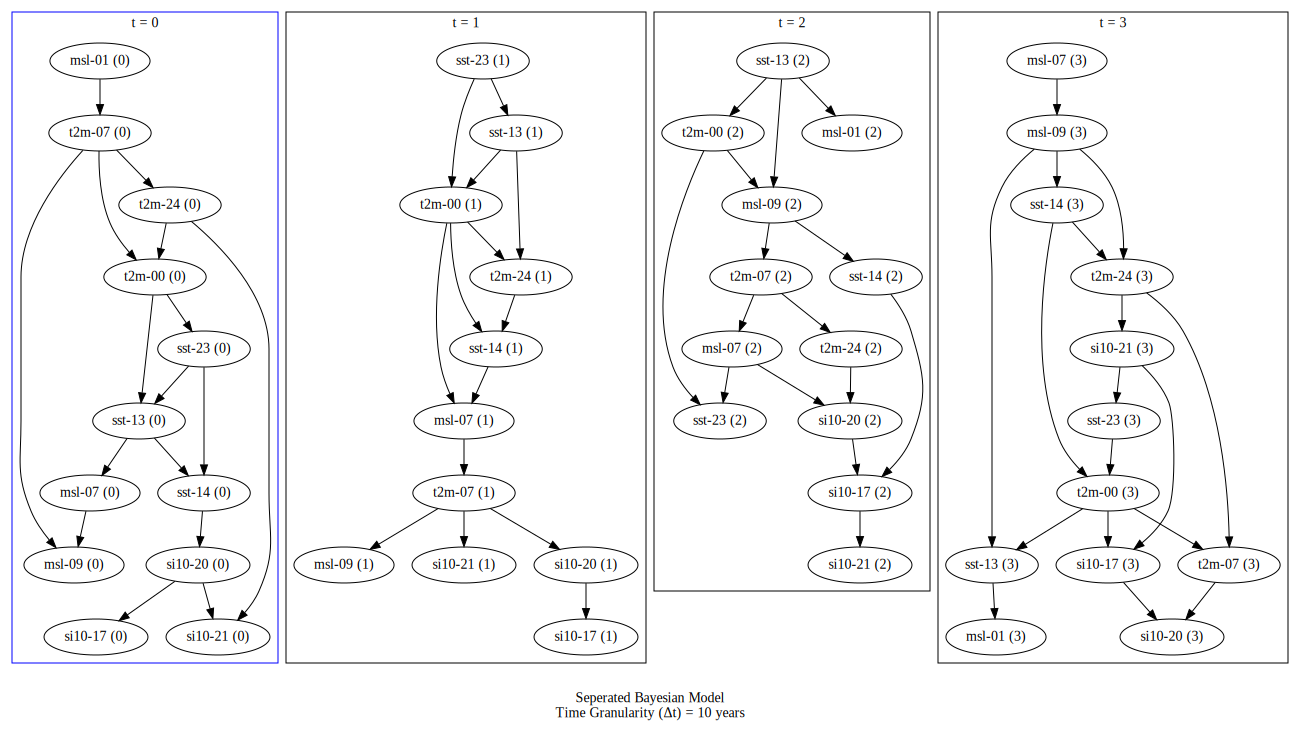

In [0]:

g = Digraph('Climate', filename='Start_Climate_Model') #name, filename
g.attr(label='\nSeperated Bayesian Model\nTime Granularity (Δt) = 10 years')

i=0
for model in bayesianModels:
  name1 = "cluster: " + str(i)
  with g.subgraph(name=name1) as c:
    label = "t = " + str(i)
    if i == 0:
      c.attr(label=label, color='Blue')
    else:
      c.attr(label=label)
    c.edges(model.edges())
    
  i+=1
  
g.view() #print network
g

In [0]:
from pgmpy.estimators import ConstraintBasedEstimator, BayesianEstimator
from pgmpy.estimators import BdeuScore, K2Score, BicScore

def is_independent(est, X, Y, Zs=[], significance_level=0.05):
  results = est.test_conditional_independence(X, Y, Zs)
  print("Testing: %s _|_ %s given %s" % (X, Y, Zs))
  print("chi2 Value: %s" % results[0])
  print("p value: %s" % results[1])
  print("Independent?: %s" % (results[1] >= significance_level))
  print("-----------------------------------------------------------------")
  print("-----------------------------------------------------------------")
  return est.test_conditional_independence(X, Y, Zs)[1] >= significance_level
  
causalEdges = []
causalCPDs = []

#loop through bayesian models
for i in range(0, len(bayesianModels) - 1):
  priorData = sets[i]
  postData = sets[i+1]
  priorNodes = bayesianModels[i].nodes()
  posteriorNodes = bayesianModels[i+1].nodes()
  #calculate dependencies between prior and posterior networks
  
  for j in range(0, len(priorNodes)): #look at each prior node
    pastNodeData = priorData[priorNodes[j]]
    
    for k in range(0, len(posteriorNodes)): #take one prior node and compare it with every posterior node
      postNodeData = postData[posteriorNodes[k]]
      mergeTemp = pd.concat([pastNodeData, postNodeData], axis=1, sort=False)
      tempData = pd.DataFrame(mergeTemp)
      
      estimator = ConstraintBasedEstimator(tempData) #testing for inter dependencies
      try:
        independent = is_independent(estimator, priorNodes[j], posteriorNodes[k], posteriorNodes[k-1])
      except:
        #posterior node has no predecessors
        independent = is_independent(estimator, priorNodes[j], posteriorNodes[k])
      if(not independent):
        causalEdges.append((priorNodes[j], posteriorNodes[k]))
        
        #calculate CPD for this new edge
        u = priorNodes[j]
        v = posteriorNodes[k]
        model = BayesianModel([(u, v)])
        cpdEstimate = BayesianEstimator(model, tempData)
        #Estimate cpd and add it to causalCPDs
        cpd = cpdEstimate.estimate_cpd(posteriorNodes[k], prior_type='BDeu', equivalent_sample_size=50)
        causalCPDs.append(cpd)
        
      
    
print("\nCausal Edges:\n%s" % causalEdges)
print("\n\nCausal CPDs:\n")
for cpd in causalCPDs:
    print(cpd)


Testing: t2m-00 (0) _|_ t2m-00 (1) given []
chi2 Value: 48.38002829657742
p value: 2.2079307161637257e-05
Independent?: False
-----------------------------------------------------------------
-----------------------------------------------------------------
Testing: t2m-00 (0) _|_ t2m-07 (1) given []
chi2 Value: 11.280111438549168
p value: 0.9140560762039581
Independent?: True
-----------------------------------------------------------------
-----------------------------------------------------------------
Testing: t2m-00 (0) _|_ msl-09 (1) given []
chi2 Value: 17.748521836283828
p value: 0.5392907961899579
Independent?: True
-----------------------------------------------------------------
-----------------------------------------------------------------
Testing: t2m-00 (0) _|_ si10-20 (1) given []
chi2 Value: 28.432497830938665
p value: 0.07545149180048111
Independent?: True
-----------------------------------------------------------------
--------------------------------------------

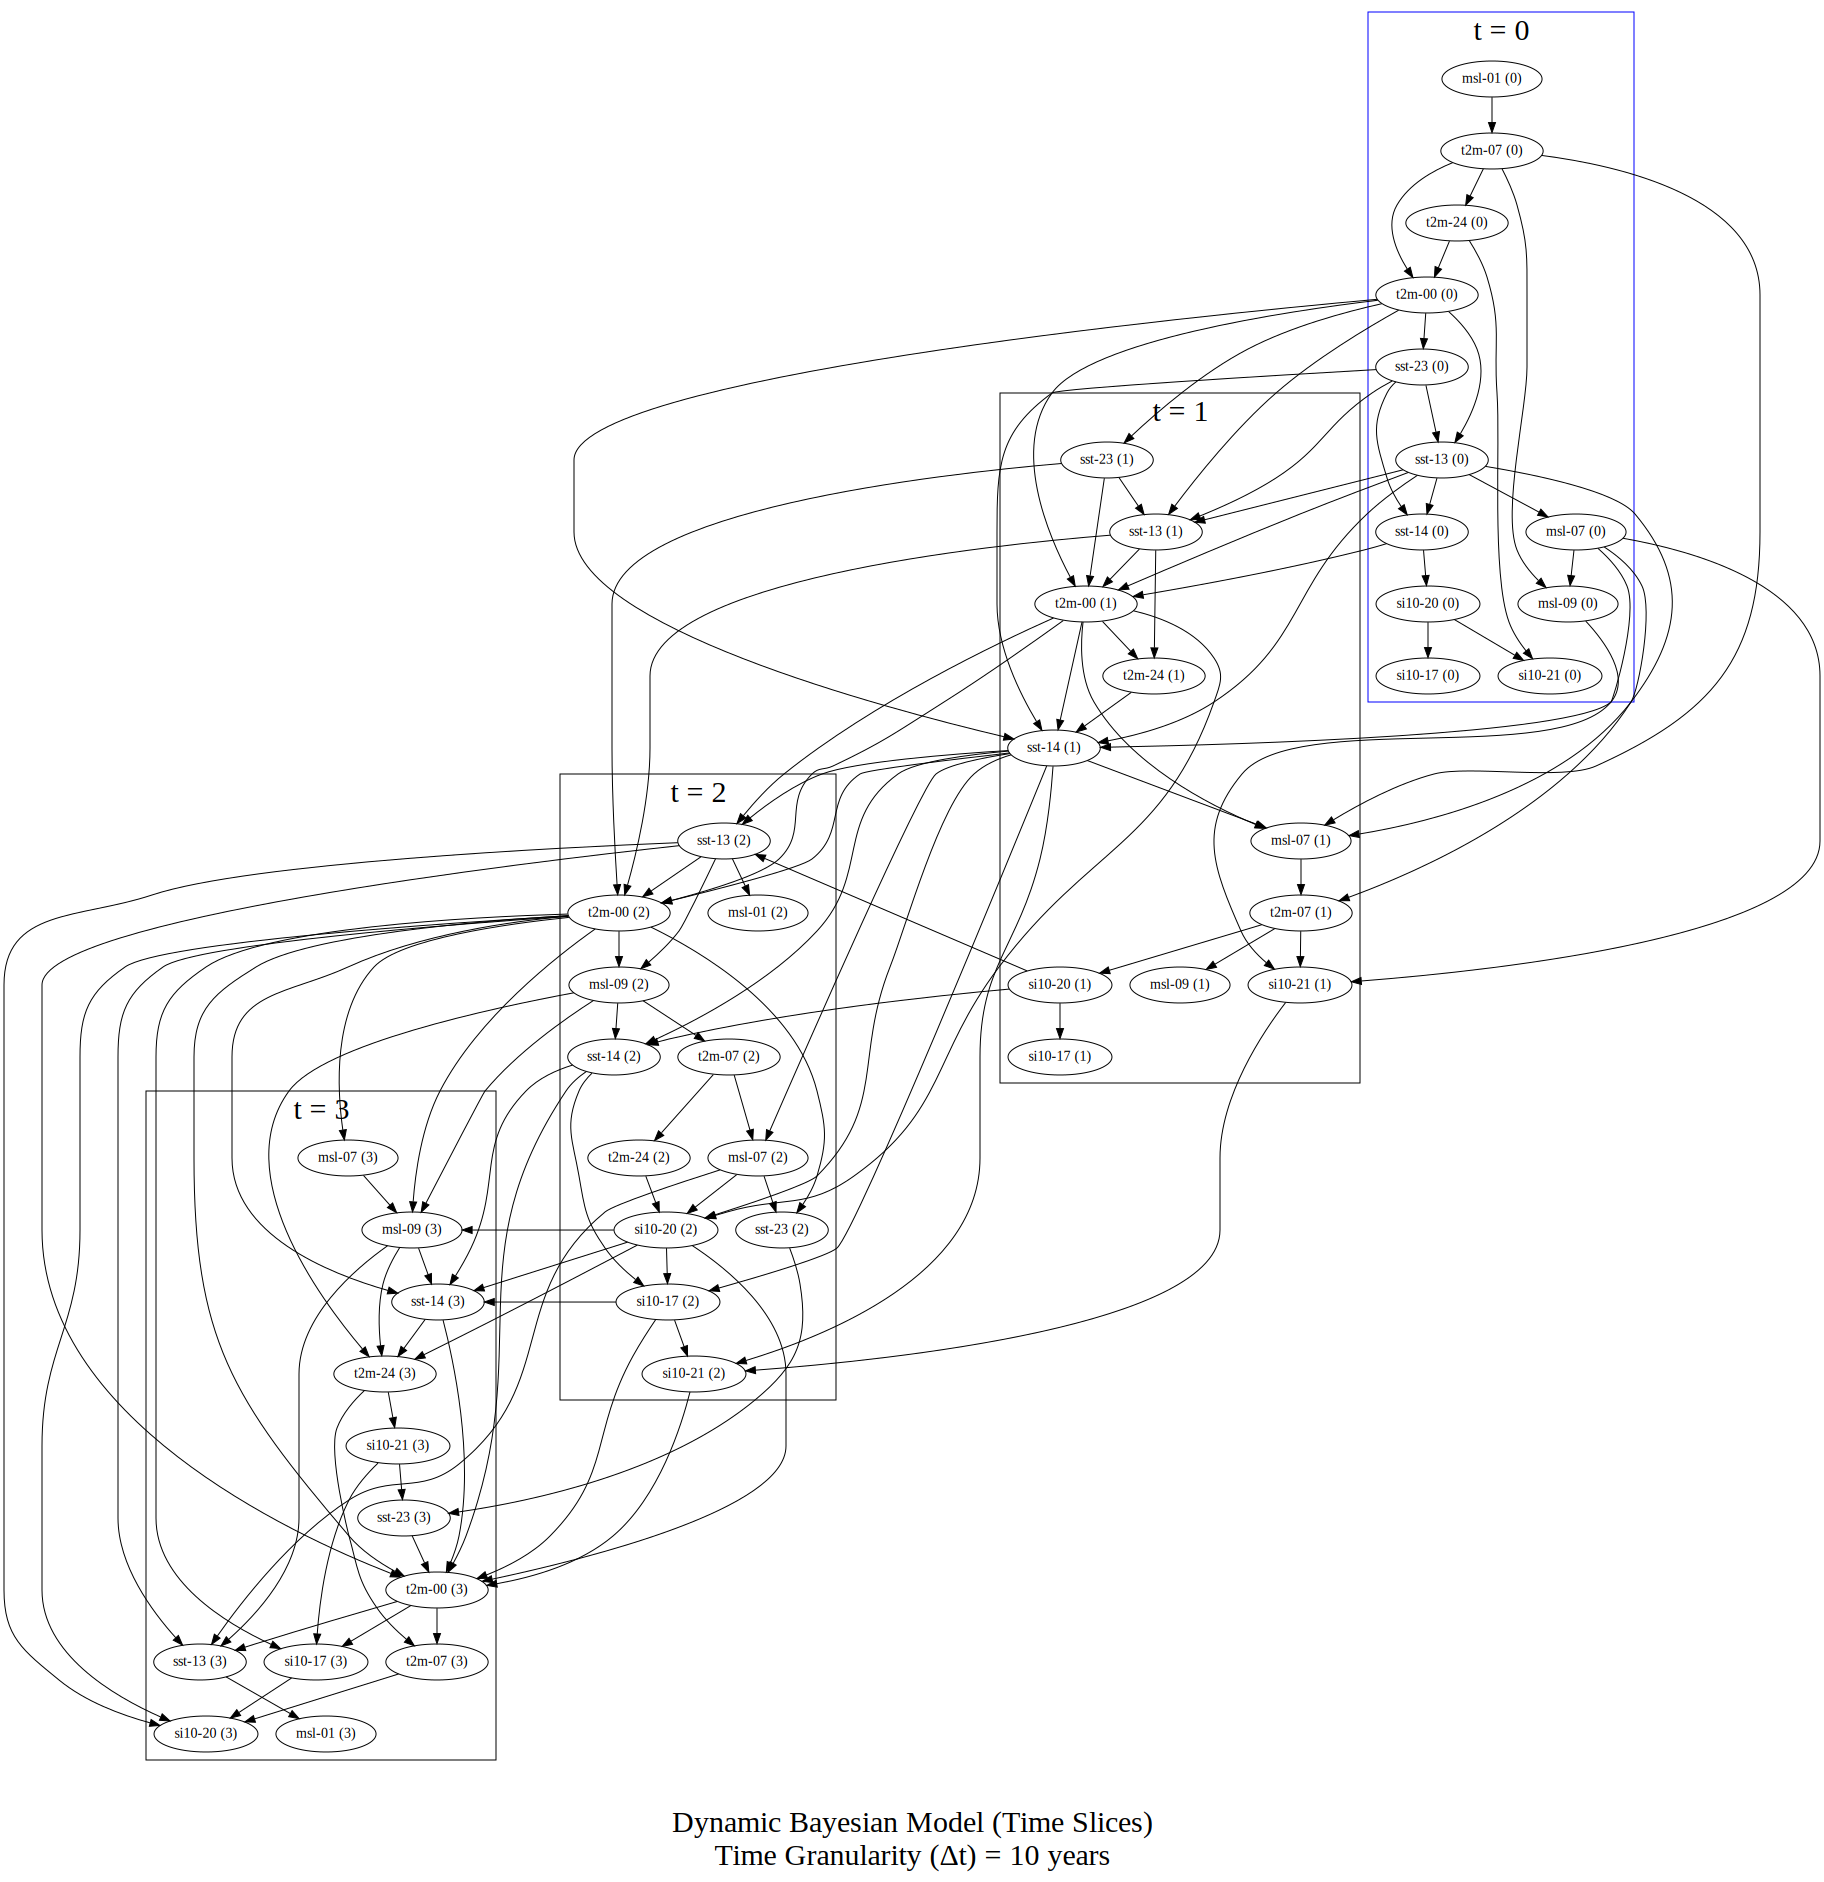

In [0]:
g = Digraph('Climate', filename='Climate_Model') #name, filename
g.attr(label='\nDynamic Bayesian Model (Time Slices)\nTime Granularity (Δt) = 10 years')
g.attr(fontsize='30')

i=0
for model in bayesianModels:
  name1 = "cluster: " + str(i)
  with g.subgraph(name=name1) as c:
    label = "t = " + str(i)
    if i == 0:
      c.attr(label=label, color='Blue')
    else:
      c.attr(label=label)
    c.edges(model.edges())
    
  i+=1
  
g.edges(causalEdges)
g.view()
g

Adding causal edges and cpds to the bayesian models

In [0]:
#given the column name, this will return the slice it was put in
def getSlice(name):
  return int(name[name.rfind("(")+1 : name.rfind(")")])

skelDbn = []

#adding causal edges and CPDs to bayesian models
i = 0
for cause in causalEdges:
  parent = cause[0]
  child = cause[1]
  bayesianModels[getSlice(cause[0])].add_edge(parent, child)
  bayesianModels[getSlice(cause[0])].add_cpds(causalCPDs[i])
  i+=1
  
for model in bayesianModels:
  print(model.edges())
  

[('msl-09 (0)', 'msl-07 (0)'), ('msl-09 (0)', 'si10-21 (1)'), ('si10-21 (0)', 'si10-20 (0)'), ('si10-20 (0)', 'si10-17 (0)'), ('si10-17 (0)', 'msl-09 (0)'), ('msl-07 (0)', 'si10-21 (1)')]
[('si10-21 (1)', 'msl-07 (1)'), ('si10-21 (1)', 'si10-21 (2)'), ('si10-20 (1)', 'si10-17 (1)'), ('si10-17 (1)', 'si10-21 (1)'), ('msl-07 (1)', 'msl-09 (1)')]
[('msl-09 (2)', 'msl-09 (3)'), ('si10-20 (2)', 'si10-17 (2)'), ('si10-20 (2)', 'msl-09 (3)'), ('si10-17 (2)', 'si10-21 (2)'), ('si10-17 (2)', 'msl-09 (2)'), ('msl-07 (2)', 'si10-20 (2)')]
[('msl-09 (3)', 'msl-01 (3)'), ('si10-21 (3)', 'si10-17 (3)'), ('si10-21 (3)', 'msl-07 (3)'), ('si10-17 (3)', 'si10-20 (3)'), ('msl-07 (3)', 'msl-09 (3)')]


Print out all the conditional probability distributions

In [0]:
for model in bayesianModels:
  for cpd in model.get_cpds():
    print(cpd)

+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+----------------------+-----------------+----------------------+-----------------+-----------------------+----------------------+-----------------+-----------------+-----------------+-----------------------+----------------------+-----------------+----------------------+----------------------+-----------------+
| t2m-07 (0)      | t2m-07 (0)(0.0) | t2m-07 (0)(0.0) | t2m-07 (0)(0.0) | t2m-07 (0)(0.0) | t2m-07 (0)(1.0) | t2m-07 (0)(1.0)      | t2m-07 (0)(1.0) | t2m-07 (0)(1.0)      | t2m-07 (0)(2.0) | t2m-07 (0)(2.0)       | t2m-07 (0)(2.0)      | t2m-07 (0)(2.0) | t2m-07 (0)(3.0) | t2m-07 (0)(3.0) | t2m-07 (0)(3.0)       | t2m-07 (0)(3.0)      | t2m-07 (0)(4.0) | t2m-07 (0)(4.0)      | t2m-07 (0)(4.0)      | t2m-07 (0)(4.0) |
+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+----------------------+-----------------+------

# Conclusion

This approach seeks to represent a dynamic system by partitioning the data into  seperate time slices and finding the connections between these time slices. The idea was to find bayesian networks for each time slice and using the prior and posterior time slices, I would loop through and find any dependencies the posterior time slice has with the prior. After further research, I learned that dependence does not necessarily mean causality. With this approach, it only finds dependencies between time slices not the causal relationships between variables. The next approach for discovering causality would be to use time lag to discover the effect a variables has on the data.


Remember: A dynamic bayesian network is temporal extension of Bayesian networks does not mean that the network structure or parameters changes dynamically, but that a dynamic system is modeled. 